**Table of Contents**
<div id="toc"></div>

# Importing DF

In [1]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression as LR
from scipy.constants import physical_constants as phy
import random
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import math
from scipy import stats
import scipy.constants as sc
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit, fit_report
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import statsmodels.formula.api as sm
import seaborn as sns
sns.set(color_codes = True)
np.random.seed(1974)
ev = phy["joule-electron volt relationship"]
bolts = phy["Boltzmann constant in eV/K"]
k = bolts[0]
# Let printing work the same in Python 2 and 3
from __future__ import print_function
random.seed(1)

In [2]:
df1 = pd.read_csv('../Data/snail_respiration_BK.csv', sep =',')

df1["stream_temp"] = df1["stream_temp"].astype(str)

new_df = df1[["stream", "stream_temp", "exp_temp", "mass","resp"]]

# Adding new columns to df

In [3]:
# y = t - t0/ k t t0   t0 normally mean of t approx
workingdf = new_df.assign(Exp_Temp_K = new_df["exp_temp"] + 273.15)
workingdf = workingdf.assign(log_resp = lambda x: np.log((x.resp)))
workingdf = workingdf.assign(mass_g = lambda x: x["mass"]/1000)
workingdf = workingdf.assign(x1 = lambda x: ((x["Exp_Temp_K"] - 290.65)/(k*x["Exp_Temp_K"]*290.65)))
workingdf = workingdf.assign(x2 = lambda x: (1/(k * x["Exp_Temp_K"]) ))
workingdf = workingdf.assign(log_mass_resp = lambda x: np.log(x["resp"] * (x["mass_g"]**(-3./4))))
workingdf = workingdf.assign(lnmass = lambda x: np.log(x["mass_g"]))
workingdf = workingdf.assign(mass_resp = lambda x: x["resp"] * (x["mass_g"]**(-3./4)))
workingdf = workingdf.dropna()
new_df = workingdf
workingdf = workingdf[(workingdf["exp_temp"] <= 30)]

M = workingdf["mass_g"]
T = workingdf["Exp_Temp_K"] 
b = 0.75
power = (k * T)
#workingdf = workingdf.loc[(workingdf["exp_temp"] < 31) & (workingdf["exp_temp"] > 14)]
workingdf

,stream,stream_temp,exp_temp,mass,resp,Exp_Temp_K,log_resp,mass_g,x1,x2,log_mass_resp,lnmass,mass_resp
0,11,5.6,5,3.014683,0.010438,278.15,-4.562267,0.003015,-1.794270,41.720374,-0.209072,-5.804261,0.811337
1,11,5.6,5,3.014683,0.016002,278.15,-4.135015,0.003015,-1.794270,41.720374,0.218180,-5.804261,1.243811
2,11,5.6,5,11.716683,0.039203,278.15,-3.239007,0.011717,-1.794270,41.720374,0.096049,-4.446742,1.100814
3,11,5.6,5,11.716683,0.042461,278.15,-3.159176,0.011717,-1.794270,41.720374,0.175880,-4.446742,1.192295
4,11,5.6,5,13.338753,0.042687,278.15,-3.153868,0.013339,-1.794270,41.720374,0.083943,-4.317082,1.087567
5,11,5.6,5,13.338753,0.076883,278.15,-2.565466,0.013339,-1.794270,41.720374,0.672345,-4.317082,1.958826
6,11,5.6,5,23.529307,0.366810,278.15,-1.002910,0.023529,-1.794270,41.720374,1.809221,-3.749509,6.105692
7,11,5.6,10,16.986706,0.198874,283.15,-1.615086,0.016987,-1.057552,40.983656,1.441407,-4.075324,4.226640
8,11,5.6,10,21.959874,0.143871,283.15,-1.938837,0.021960,-1.057552,40.983656,0.925067,-3.818538,2.522036
9,11,5.6,10,29.566405,0.227699,283.15,-1.479730,0.029566,-1.057552,40.983656,1.161108,-3.521117,3.193468


# Linear Regression

## On T - t0/ kTT0

In [4]:
print("Statsmodel.Formula.Api Method")
model1 = smf.ols(formula='log_resp ~ x1', data=workingdf).fit()
print(model1.params)
model1.summary()
print("\nThe aic of this model is: ", model1.aic, "\nand the bic is: ", model1.bic)


Statsmodel.Formula.Api Method
Intercept   -1.813531
x1           0.835203
dtype: float64

The aic of this model is:  871.622967552 
and the bic is:  879.257189872


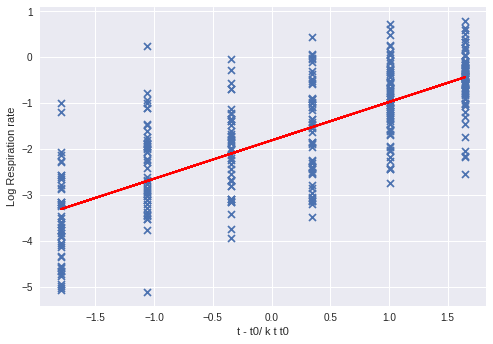

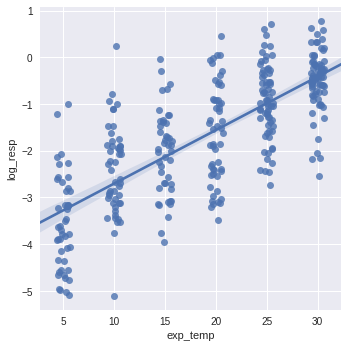

In [5]:
#sns.stripplot(x='x1', y='log_resp', data= workingdf, jitter=True) 
plt.scatter("x1", "log_resp", data=workingdf,  marker='x')
plt.plot(workingdf["x1"], model1.params[0] + workingdf["x1"]*model1.params[1], color='red')
plt.ylabel('Log Respiration rate')
plt.xlabel('t - t0/ k t t0')
plt.show()

p = sns.lmplot(x = "exp_temp", y = "log_resp", data= workingdf, x_jitter= 0.7)

In [6]:
y1 = (workingdf["log_resp"]).values.reshape(-1,1)
x1 = (workingdf["x1"]).values.reshape(-1,1)

print("Sci-Kit Learn Method")
model2 = LR()
model2.fit(x1, y1)
print(model2.coef_[0][0])
print(model2.intercept_[0])

Sci-Kit Learn Method
0.83520344795
-1.81353122058


## 1/kt

In [7]:
print("Statsmodel.Formula.Api Method")
model3 = smf.ols(formula='log_resp ~ x2', data=workingdf).fit()
print(model3.params)
model3.summary()
print("\nThe aic of this model is: ", model3.aic, "\nand the bic is: ", model3.bic)


Statsmodel.Formula.Api Method
Intercept    31.532888
x2           -0.835203
dtype: float64

The aic of this model is:  871.622967552 
and the bic is:  879.257189872


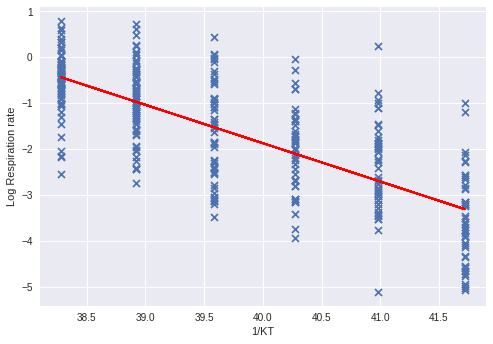

40.983655696696246

In [49]:
#sns.stripplot(x='x1', y='log_resp', data= workingdf, jitter=True) 
plt.scatter("x2", "log_resp", data=workingdf,  marker='x')
plt.plot(workingdf["x2"], model3.params[0] + workingdf["x2"]*model3.params[1], color='red')
plt.ylabel('Log Respiration rate')
plt.xlabel('1/KT')
plt.show()



## x2 on log_resp_mass

ln(resp * mass ^ -3/4) = ln(B0) - E (1/kT)

In [9]:
print("Statsmodel.Formula.Api Method")
model4 = smf.ols(formula='log_mass_resp ~ x2', data=workingdf).fit()
print(model4.params)
model4.summary()
print("\nThe aic of this model is: ", model4.aic, "\nand the bic is: ", model4.bic)

Statsmodel.Formula.Api Method
Intercept    33.674651
x2           -0.799772
dtype: float64

The aic of this model is:  574.256180128 
and the bic is:  581.890402448


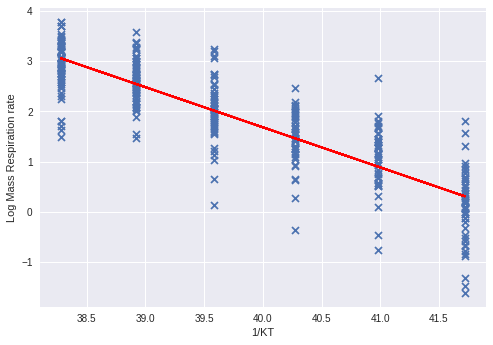

40.983655696696246

In [53]:
#sns.stripplot(x='x1', y='log_resp', data= workingdf, jitter=True) 
plt.scatter("x2", "log_mass_resp", data=workingdf,  marker='x')
plt.plot(workingdf["x2"], model4.params[0] + workingdf["x2"]*model4.params[1], color='red')
plt.ylabel('Log Mass Respiration rate')
plt.xlabel('1/KT')
plt.show()



# ln(mass) by ln(I e ^ (E/kt))

In [11]:
workingdf = workingdf.assign(lnIEkt = lambda x: np.log((x.resp) * np.exp(model4.params[1]/(k *workingdf["Exp_Temp_K"]))))
lnm, lnE = workingdf["lnmass"].values.reshape(-1,1) , workingdf["lnIEkt"].values.reshape(-1,1)
workingdf

,stream,stream_temp,exp_temp,mass,resp,Exp_Temp_K,log_resp,mass_g,x1,x2,log_mass_resp,lnmass,mass_resp,lnIEkt
0,11,5.6,5,3.014683,0.010438,278.15,-4.562267,0.003015,-1.794270,41.720374,-0.209072,-5.804261,0.811337,-37.929049
1,11,5.6,5,3.014683,0.016002,278.15,-4.135015,0.003015,-1.794270,41.720374,0.218180,-5.804261,1.243811,-37.501797
2,11,5.6,5,11.716683,0.039203,278.15,-3.239007,0.011717,-1.794270,41.720374,0.096049,-4.446742,1.100814,-36.605788
3,11,5.6,5,11.716683,0.042461,278.15,-3.159176,0.011717,-1.794270,41.720374,0.175880,-4.446742,1.192295,-36.525958
4,11,5.6,5,13.338753,0.042687,278.15,-3.153868,0.013339,-1.794270,41.720374,0.083943,-4.317082,1.087567,-36.520650
5,11,5.6,5,13.338753,0.076883,278.15,-2.565466,0.013339,-1.794270,41.720374,0.672345,-4.317082,1.958826,-35.932248
6,11,5.6,5,23.529307,0.366810,278.15,-1.002910,0.023529,-1.794270,41.720374,1.809221,-3.749509,6.105692,-34.369692
7,11,5.6,10,16.986706,0.198874,283.15,-1.615086,0.016987,-1.057552,40.983656,1.441407,-4.075324,4.226640,-34.392661
8,11,5.6,10,21.959874,0.143871,283.15,-1.938837,0.021960,-1.057552,40.983656,0.925067,-3.818538,2.522036,-34.716412
9,11,5.6,10,29.566405,0.227699,283.15,-1.479730,0.029566,-1.057552,40.983656,1.161108,-3.521117,3.193468,-34.257305


In [12]:
print("Statsmodel.Formula.Api Method")
model5 = smf.ols(formula='lnIEkt ~ lnmass', data=workingdf).fit()
print(model5.params)
model5.summary()
print("\nThe aic of this model is: ", model5.aic, "\nand the bic is: ", model5.bic)

Statsmodel.Formula.Api Method
Intercept   -29.097498
lnmass        0.923802
dtype: float64

The aic of this model is:  1417.53619596 
and the bic is:  1425.17041828


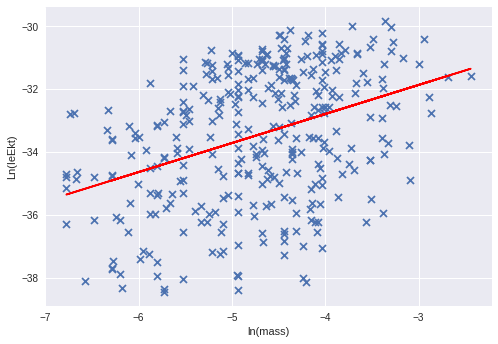

In [13]:
plt.scatter("lnmass", "lnIEkt", data=workingdf,  marker='x')
plt.plot(lnm, model5.params[0] + lnm*model5.params[1], color='red')
plt.ylabel('Ln(IeEkt)')
plt.xlabel('ln(mass)')
plt.show()

# Groupby

In [47]:
grouped = workingdf.groupby("stream_temp")


                             OLS Regression Results                            
Dep. Variable:          log_mass_resp   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     70.51
Date:                Thu, 28 Dec 2017   Prob (F-statistic):           5.31e-10
Time:                        20:37:57   Log-Likelihood:                -22.796
No. Observations:                  38   AIC:                             49.59
Df Residuals:                      36   BIC:                             52.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4370      2.472      9.078      0

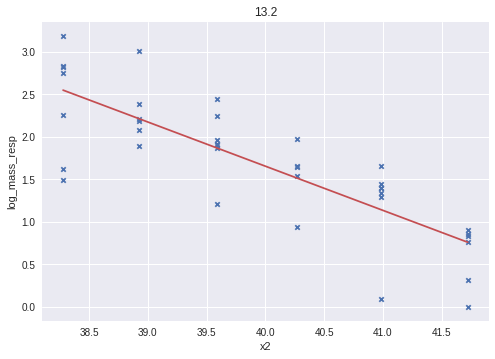


                             OLS Regression Results                            
Dep. Variable:          log_mass_resp   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     140.0
Date:                Thu, 28 Dec 2017   Prob (F-statistic):           5.77e-14
Time:                        20:37:57   Log-Likelihood:                -23.182
No. Observations:                  38   AIC:                             50.36
Df Residuals:                      36   BIC:                             53.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.2622      2.497     12.521      0

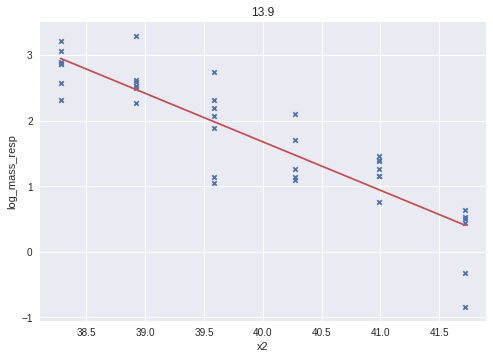


                             OLS Regression Results                            
Dep. Variable:          log_mass_resp   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     336.1
Date:                Thu, 28 Dec 2017   Prob (F-statistic):           1.43e-25
Time:                        20:37:58   Log-Likelihood:                -37.455
No. Observations:                  59   AIC:                             78.91
Df Residuals:                      57   BIC:                             83.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.5838      1.992     19.372      0

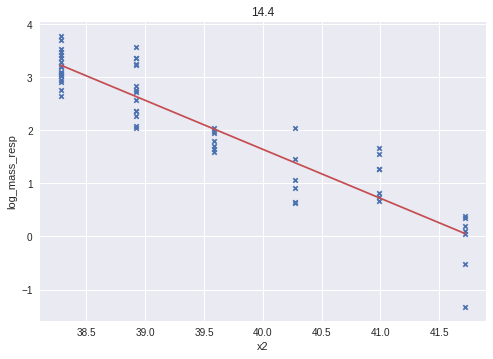


                             OLS Regression Results                            
Dep. Variable:          log_mass_resp   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     159.2
Date:                Thu, 28 Dec 2017   Prob (F-statistic):           5.20e-17
Time:                        20:37:58   Log-Likelihood:                -49.034
No. Observations:                  51   AIC:                             102.1
Df Residuals:                      49   BIC:                             105.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.4612      3.056     13.242      0

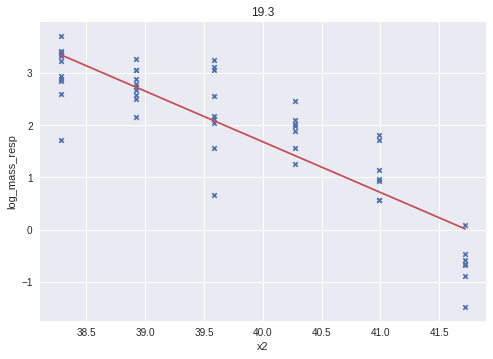


                             OLS Regression Results                            
Dep. Variable:          log_mass_resp   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     114.4
Date:                Thu, 28 Dec 2017   Prob (F-statistic):           3.51e-14
Time:                        20:37:58   Log-Likelihood:                -41.513
No. Observations:                  49   AIC:                             87.03
Df Residuals:                      47   BIC:                             90.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.2836      2.644     11.452      0

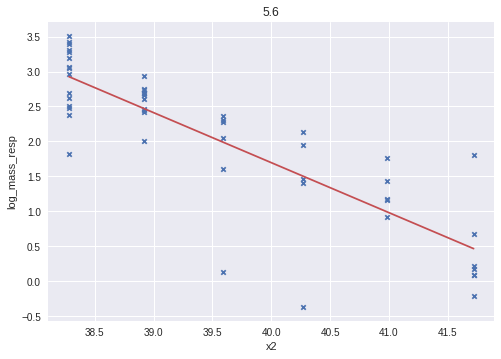


                             OLS Regression Results                            
Dep. Variable:          log_mass_resp   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     66.24
Date:                Thu, 28 Dec 2017   Prob (F-statistic):           7.35e-09
Time:                        20:37:58   Log-Likelihood:                -26.930
No. Observations:                  30   AIC:                             57.86
Df Residuals:                      28   BIC:                             60.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.8094      4.127      8.677      0

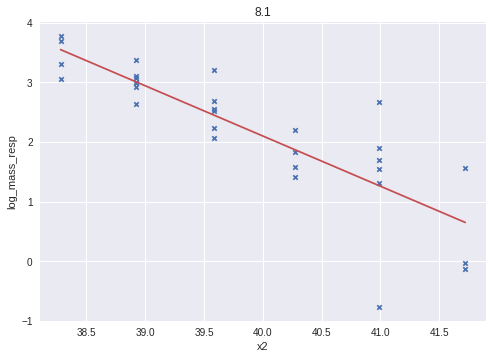


                             OLS Regression Results                            
Dep. Variable:          log_mass_resp   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     239.3
Date:                Thu, 28 Dec 2017   Prob (F-statistic):           4.02e-24
Time:                        20:37:58   Log-Likelihood:                -51.075
No. Observations:                  71   AIC:                             106.2
Df Residuals:                      69   BIC:                             110.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.3442      2.053     16.244      0

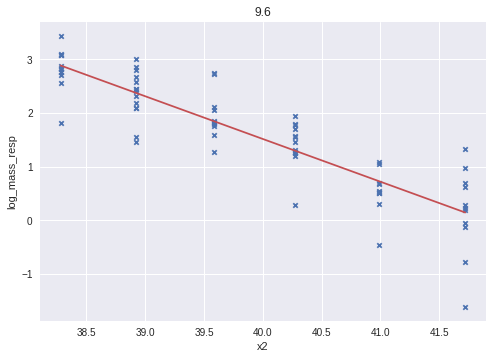

In [15]:
for name, group in grouped:
    #print("Statsmodel.Formula.Api Method")
    modelgroup = smf.ols(formula='log_mass_resp ~ x2', data=group).fit()
    y = modelgroup.params[0] + (modelgroup.params[1] * group.x2)
    print("\n", modelgroup.summary())
    print("\n" ,modelgroup.params)
    print("\nStream Temp: ",name)
    print("\nThe aic of this model is: ", modelgroup.aic, "\nand the bic is: ", modelgroup.bic)
    group.plot.scatter(x = "x2", y = "log_mass_resp", marker = "x", title = name)
    plt.plot(group.x2, y, "r" )
    plt.show()


# NLLS

## Groupby

In [56]:
def residual(param, x, workingdf = None):
    E = param["mass_resp_coef"]
    B0 = param["mass_resp_at_10"]
    Eh = param["Eh"]
    Th = param["Temp_H_K"]
    #Tl = param["Temp_L_K"]
    #El = param["Temp_L_K"]
    K = param["boltz"]
    exp1 = ((-E)/K) * (1/x - 1/283.15)
    #print(exp1)
    exp2 = (Eh/K) * (1/Th - 1/x)
    #print(exp2)
    #exp3 = (El/K) * (1/Tl - 1/x)
    #model = (B0 * np.exp(exp1))/(1 + np.exp(exp3) + np.exp(exp2))
    model = (B0 * np.exp(exp1))/(1 + np.exp(exp2))
    
    if workingdf is None:
        return model
    
    return model - workingdf

mass_resp_10 = np.log(model4.params[0] + (1/(k * 283.15) * model4.params[1]))


last_EH_aic_val = 100000
last_EH_bic_val = 100000


try_params = Parameters()
try_params.add_many(("mass_resp_coef", -(model4.params[1]),  True, 0, 1),
               ("mass_resp_at_10", mass_resp_10 , True),
               #("Eh", Eh, True, -(mass_resp_slope), 5),
               ("Temp_H_K", 303, False),
               #("Temp_L_K", Temp_L_K, True, 273, 283),
               ("boltz", k, False))
               #("El", 0.3, True, -2.0, 2.0))
               #("mass_resp_intercept", mass_resp_intercept_lr, True, 30, 35))

<Parameter 'Eh', value=4.5746157230174598 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 54
    # data points      = 58
    # variables        = 2
    chi-square         = 3019.555
    reduced chi-square = 53.921
[[Variables]]
    mass_resp_coef:    0.99999986 +/- 0.212528 (21.25%) (init= 0.7997719)
    mass_resp_at_10:   2.01603540 +/- 0.966003 (47.92%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.574616 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.968 


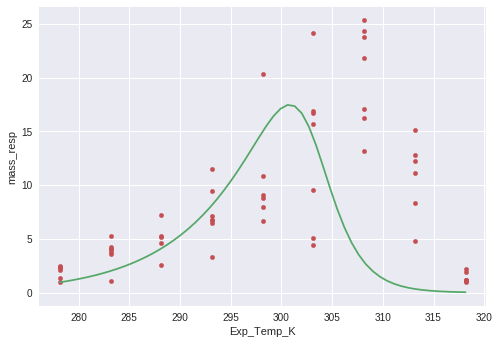

Round: 1 
The stream temp was:  13.2
AIC value: 235.28 
BIC value: 239.40 
Eh Parameter <Parameter 'Eh', value=4.5746157230174598 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.6015245642076836 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 53
    # data points      = 58
    # variables        = 2
    chi-square         = 3032.893
    reduced chi-square = 54.159
[[Variables]]
    mass_resp_coef:    1          +/- 0.059167 (5.92%) (init= 0.7997719)
    mass_resp_at_10:   2.01203287 +/- 0.969051 (48.16%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.601525 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.968

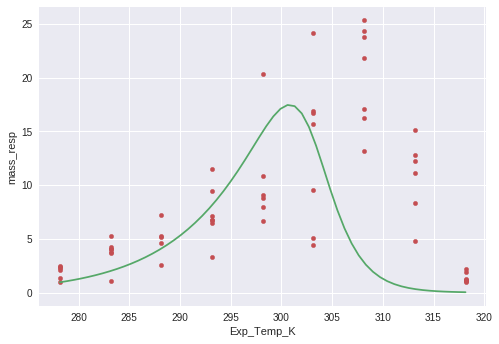

Round: 2 
The stream temp was:  13.2
AIC value: 235.53 
BIC value: 239.65 
Eh Parameter <Parameter 'Eh', value=4.6015245642076836 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.2316944717710605 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 49
    # data points      = 58
    # variables        = 2
    chi-square         = 2835.154
    reduced chi-square = 50.628
[[Variables]]
    mass_resp_coef:    1          +/- 0.028089 (2.81%) (init= 0.7997719)
    mass_resp_at_10:   2.06688918 +/- 0.922865 (44.65%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.231694 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.967

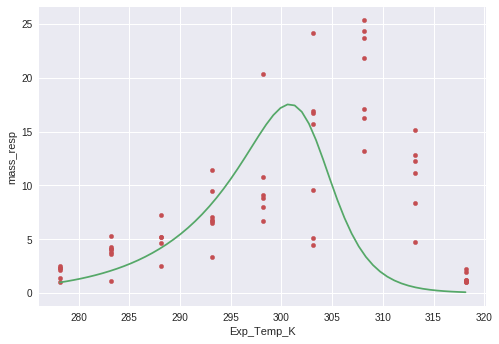

Round: 3 
The stream temp was:  13.2
AIC value: 231.62 
BIC value: 235.74 
Eh Parameter <Parameter 'Eh', value=4.2316944717710605 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.0900363623854874 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 43
    # data points      = 58
    # variables        = 2
    chi-square         = 1308.026
    reduced chi-square = 23.358
[[Variables]]
    mass_resp_coef:    0.99999997 +/- 0.080858 (8.09%) (init= 0.7997719)
    mass_resp_at_10:   2.19570721 +/- 0.487764 (22.21%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.090036 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.956

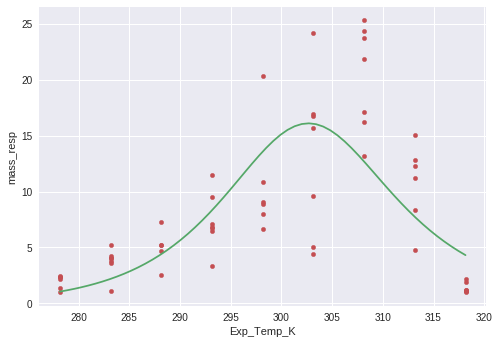

Round: 4 
The stream temp was:  13.2
AIC value: 186.75 
BIC value: 190.87 
Eh Parameter <Parameter 'Eh', value=2.0900363623854874 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.2906873308462323 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 30
    # data points      = 58
    # variables        = 2
    chi-square         = 1593.147
    reduced chi-square = 28.449
[[Variables]]
    mass_resp_coef:    0.67015984 +/- 0.069027 (10.30%) (init= 0.7997719)
    mass_resp_at_10:   4.26682078 +/- 0.831410 (19.49%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.290687 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.92

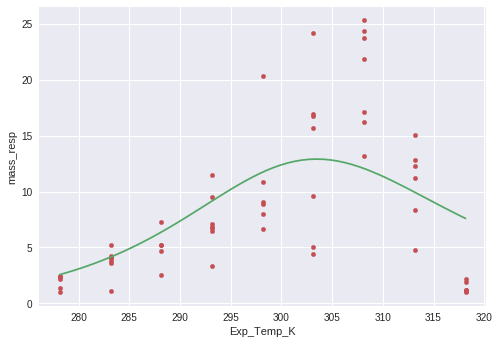

Round: 5 
The stream temp was:  13.2
AIC value: 198.19 
BIC value: 202.31 
Eh Parameter <Parameter 'Eh', value=1.2906873308462323 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.7816570839949639 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 54
    # data points      = 58
    # variables        = 2
    chi-square         = 2547.975
    reduced chi-square = 45.500
[[Variables]]
    mass_resp_coef:    1          +/- 4.98e-05 (0.00%) (init= 0.7997719)
    mass_resp_at_10:   2.13914515 +/- 0.853466 (39.90%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.781657 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.966

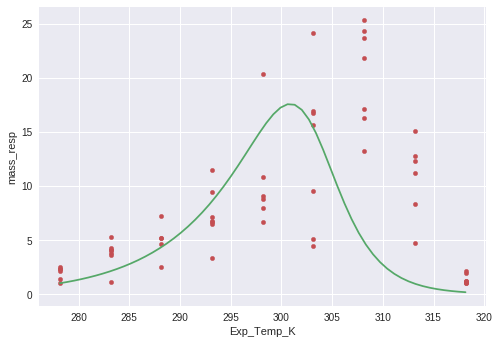

Round: 6 
The stream temp was:  13.2
AIC value: 225.43 
BIC value: 229.55 
Eh Parameter <Parameter 'Eh', value=3.7816570839949639 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.8441565137939193 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 51
    # data points      = 58
    # variables        = 2
    chi-square         = 3146.399
    reduced chi-square = 56.186
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.239865 (23.99%) (init= 0.7997719)
    mass_resp_at_10:   1.97893979 +/- 0.995005 (50.28%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.844157 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.96

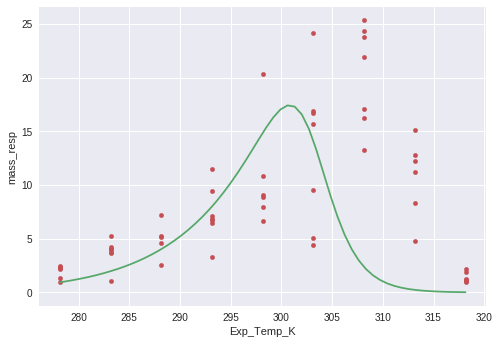

Round: 7 
The stream temp was:  13.2
AIC value: 237.66 
BIC value: 241.78 
Eh Parameter <Parameter 'Eh', value=4.8441565137939193 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.350166513147486 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 39
    # data points      = 58
    # variables        = 2
    chi-square         = 1405.173
    reduced chi-square = 25.092
[[Variables]]
    mass_resp_coef:    0.99999986 +/- 0.090479 (9.05%) (init= 0.7997719)
    mass_resp_at_10:   2.26399529 +/- 0.533309 (23.56%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.350167 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.957 

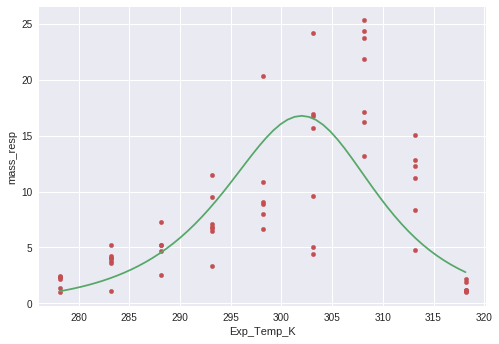

Round: 8 
The stream temp was:  13.2
AIC value: 190.91 
BIC value: 195.03 
Eh Parameter <Parameter 'Eh', value=2.350166513147486 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.5651594429026208 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 61
    # data points      = 58
    # variables        = 2
    chi-square         = 3014.831
    reduced chi-square = 53.836
[[Variables]]
    mass_resp_coef:    1          +/- 0.003420 (0.34%) (init= 0.7997719)
    mass_resp_at_10:   2.01737144 +/- 0.964912 (47.83%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.565159 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.968 

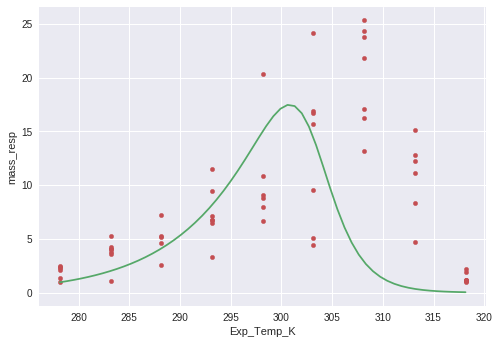

Round: 9 
The stream temp was:  13.2
AIC value: 235.18 
BIC value: 239.31 
Eh Parameter <Parameter 'Eh', value=4.5651594429026208 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.0110076091405675 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 36
    # data points      = 58
    # variables        = 2
    chi-square         = 1306.175
    reduced chi-square = 23.325
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.006123 (0.61%) (init= 0.7997719)
    mass_resp_at_10:   2.16181211 +/- 0.479126 (22.16%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.011008 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.956

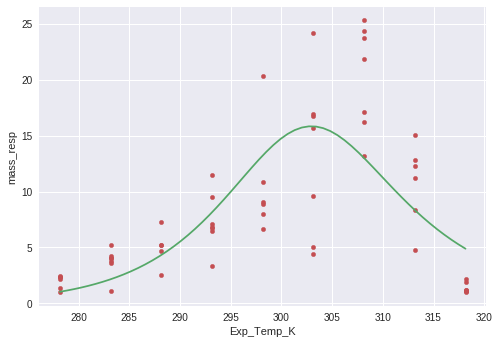

Round: 10 
The stream temp was:  13.2
AIC value: 186.67 
BIC value: 190.79 
Eh Parameter <Parameter 'Eh', value=2.0110076091405675 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.3125067964444059 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 20
    # data points      = 58
    # variables        = 2
    chi-square         = 1578.173
    reduced chi-square = 28.182
[[Variables]]
    mass_resp_coef:    0.67961404 +/- 0.069140 (10.17%) (init= 0.7997719)
    mass_resp_at_10:   4.19037219 +/- 0.817798 (19.52%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.312507 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.9

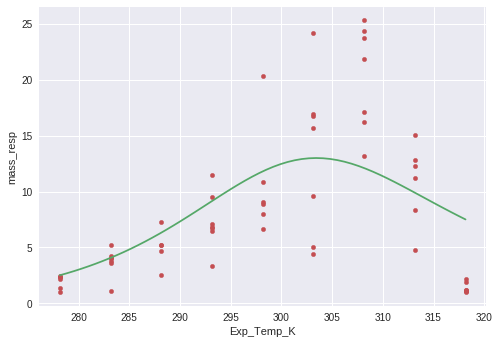

Round: 11 
The stream temp was:  13.2
AIC value: 197.64 
BIC value: 201.76 
Eh Parameter <Parameter 'Eh', value=1.3125067964444059 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.0189813978144109 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 48
    # data points      = 58
    # variables        = 2
    chi-square         = 1939.348
    reduced chi-square = 34.631
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.034868 (3.49%) (init= 0.7997719)
    mass_resp_at_10:   2.25542163 +/- 0.695559 (30.84%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.018981 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.96

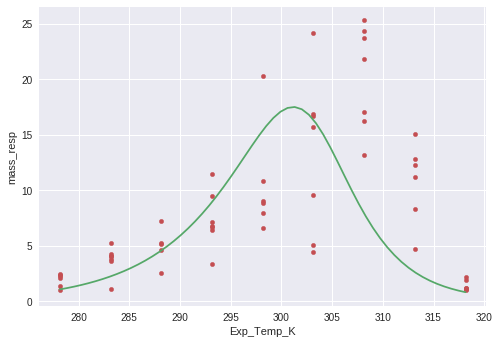

Round: 12 
The stream temp was:  13.2
AIC value: 209.60 
BIC value: 213.72 
Eh Parameter <Parameter 'Eh', value=3.0189813978144109 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.2477086773973616 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 52
    # data points      = 58
    # variables        = 2
    chi-square         = 2135.594
    reduced chi-square = 38.136
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.026670 (2.67%) (init= 0.7997719)
    mass_resp_at_10:   2.22446130 +/- 0.748388 (33.64%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.247709 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.96

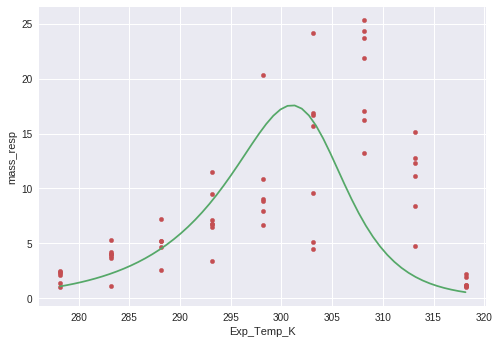

Round: 13 
The stream temp was:  13.2
AIC value: 215.19 
BIC value: 219.31 
Eh Parameter <Parameter 'Eh', value=3.2477086773973616 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.3377875814551761 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 32
    # data points      = 58
    # variables        = 2
    chi-square         = 1561.291
    reduced chi-square = 27.880
[[Variables]]
    mass_resp_coef:    0.69057938 +/- 0.069304 (10.04%) (init= 0.7997719)
    mass_resp_at_10:   4.10306891 +/- 0.802096 (19.55%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.337788 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.9

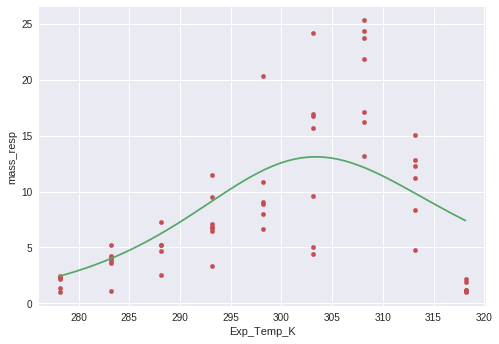

Round: 14 
The stream temp was:  13.2
AIC value: 197.02 
BIC value: 201.14 
Eh Parameter <Parameter 'Eh', value=1.3377875814551761 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.128894261419525 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 41
    # data points      = 58
    # variables        = 2
    chi-square         = 2034.617
    reduced chi-square = 36.332
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.154310 (15.43%) (init= 0.7997719)
    mass_resp_at_10:   2.24119340 +/- 0.721474 (32.19%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.128894 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.96

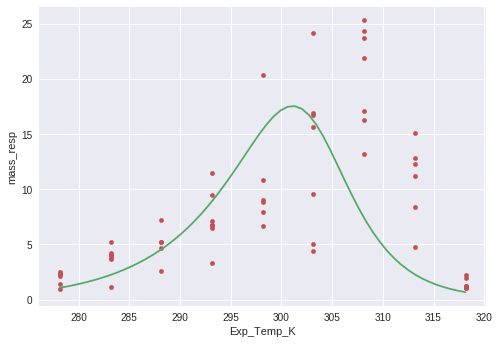

Round: 15 
The stream temp was:  13.2
AIC value: 212.38 
BIC value: 216.50 
Eh Parameter <Parameter 'Eh', value=3.128894261419525 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.5915809178830265 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 58
    # variables        = 2
    chi-square         = 1420.984
    reduced chi-square = 25.375
[[Variables]]
    mass_resp_coef:    0.80425721 +/- 0.071785 (8.93%) (init= 0.7997719)
    mass_resp_at_10:   3.27376847 +/- 0.659239 (20.14%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.591581 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.940

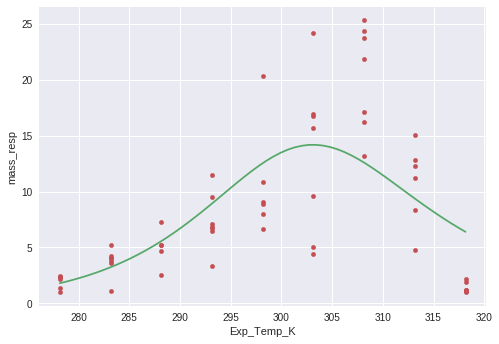

Round: 16 
The stream temp was:  13.2
AIC value: 191.56 
BIC value: 195.68 
Eh Parameter <Parameter 'Eh', value=1.5915809178830265 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.8564159350578742 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 18
    # data points      = 58
    # variables        = 2
    chi-square         = 1332.096
    reduced chi-square = 23.787
[[Variables]]
    mass_resp_coef:    0.93075233 +/- 0.076277 (8.20%) (init= 0.7997719)
    mass_resp_at_10:   2.50735977 +/- 0.534418 (21.31%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.856416 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.95

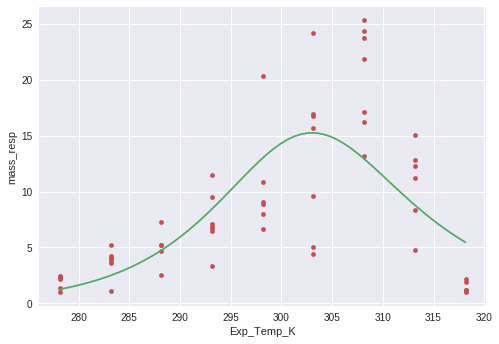

Round: 17 
The stream temp was:  13.2
AIC value: 187.81 
BIC value: 191.93 
Eh Parameter <Parameter 'Eh', value=1.8564159350578742 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.5268571449688064 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 70
    # data points      = 58
    # variables        = 2
    chi-square         = 2360.618
    reduced chi-square = 42.154
[[Variables]]
    mass_resp_coef:    1          +/- 0.047731 (4.77%) (init= 0.7997719)
    mass_resp_at_10:   2.18039922 +/- 0.806702 (37.00%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.526857 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.96

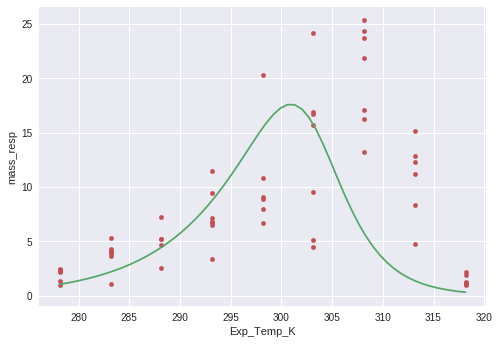

Round: 18 
The stream temp was:  13.2
AIC value: 221.00 
BIC value: 225.12 
Eh Parameter <Parameter 'Eh', value=3.5268571449688064 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.8501090973291259 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 65
    # data points      = 58
    # variables        = 2
    chi-square         = 2595.214
    reduced chi-square = 46.343
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.083454 (8.35%) (init= 0.7997719)
    mass_resp_at_10:   2.12776306 +/- 0.865074 (40.66%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.850109 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.96

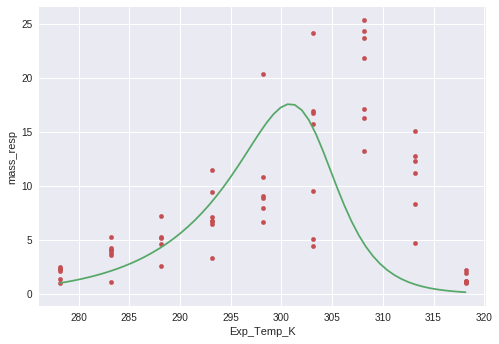

Round: 19 
The stream temp was:  13.2
AIC value: 226.49 
BIC value: 230.61 
Eh Parameter <Parameter 'Eh', value=3.8501090973291259 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.1266662562240297 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 45
    # data points      = 59
    # variables        = 2
    chi-square         = 2818.220
    reduced chi-square = 49.442
[[Variables]]
    mass_resp_coef:    0.99999997 +/- 0.654115 (65.41%) (init= 0.7997719)
    mass_resp_at_10:   2.46253875 +/- 0.899560 (36.53%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.126666 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.9

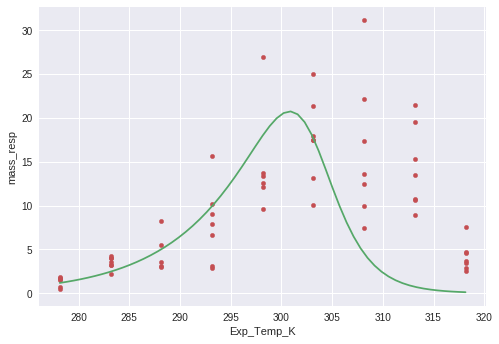

Round: 1 
The stream temp was:  13.9
AIC value: 234.15 
BIC value: 238.30 
Eh Parameter <Parameter 'Eh', value=4.1266662562240297 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.9946916955745806 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 284
    # data points      = 59
    # variables        = 2
    chi-square         = 2735.094
    reduced chi-square = 47.984
[[Variables]]
    mass_resp_coef:    0.99999995 +/- 1.802599 (180.26%) (init= 0.7997719)
    mass_resp_at_10:   2.48001804 +/- 0.880056 (35.49%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.994692 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.

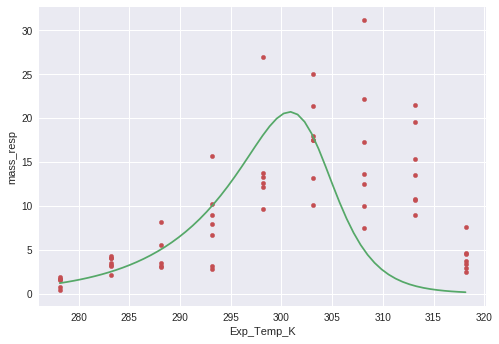

Round: 2 
The stream temp was:  13.9
AIC value: 232.38 
BIC value: 236.54 
Eh Parameter <Parameter 'Eh', value=3.9946916955745806 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.8318741044161315 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 29
    # data points      = 59
    # variables        = 2
    chi-square         = 1250.018
    reduced chi-square = 21.930
[[Variables]]
    mass_resp_coef:    0.92018874 +/- 0.062855 (6.83%) (init= 0.7997719)
    mass_resp_at_10:   2.93626456 +/- 0.516326 (17.58%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.831874 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.950

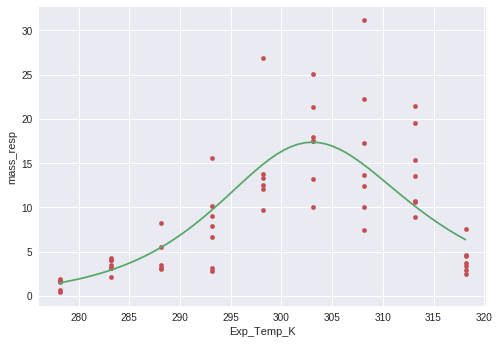

Round: 3 
The stream temp was:  13.9
AIC value: 186.18 
BIC value: 190.34 
Eh Parameter <Parameter 'Eh', value=1.8318741044161315 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.6415554087467448 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 35
    # data points      = 59
    # variables        = 2
    chi-square         = 1313.389
    reduced chi-square = 23.042
[[Variables]]
    mass_resp_coef:    0.83671631 +/- 0.060384 (7.22%) (init= 0.7997719)
    mass_resp_at_10:   3.49329072 +/- 0.593868 (17.00%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.641555 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.943

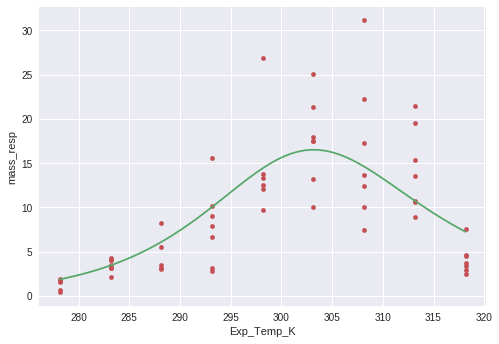

Round: 4 
The stream temp was:  13.9
AIC value: 189.10 
BIC value: 193.26 
Eh Parameter <Parameter 'Eh', value=1.6415554087467448 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.6596782706321447 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 59
    # data points      = 59
    # variables        = 2
    chi-square         = 3104.989
    reduced chi-square = 54.473
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.123583 (12.36%) (init= 0.7997719)
    mass_resp_at_10:   2.39583568 +/- 0.965485 (40.30%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.659678 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.96

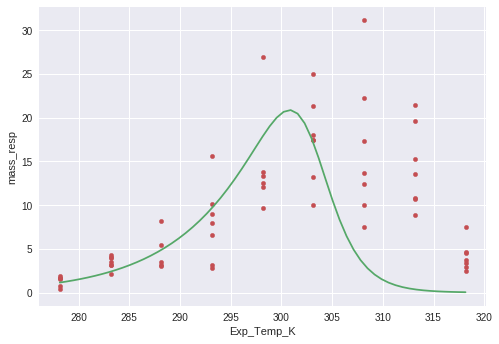

Round: 5 
The stream temp was:  13.9
AIC value: 239.87 
BIC value: 244.02 
Eh Parameter <Parameter 'Eh', value=4.6596782706321447 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.9993278839471715 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 50
    # data points      = 59
    # variables        = 2
    chi-square         = 2738.104
    reduced chi-square = 48.037
[[Variables]]
    mass_resp_coef:    1          +/- 0.114892 (11.49%) (init= 0.7997719)
    mass_resp_at_10:   2.47941171 +/- 0.880661 (35.52%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.999328 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.96

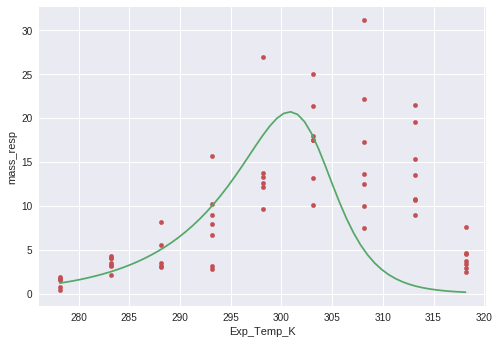

Round: 6 
The stream temp was:  13.9
AIC value: 232.45 
BIC value: 236.60 
Eh Parameter <Parameter 'Eh', value=3.9993278839471715 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.4123755931788216 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 40
    # data points      = 59
    # variables        = 2
    chi-square         = 2301.560
    reduced chi-square = 40.378
[[Variables]]
    mass_resp_coef:    1          +/- 0.005464 (0.55%) (init= 0.7997719)
    mass_resp_at_10:   2.55918928 +/- 0.775212 (30.29%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.412376 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.964

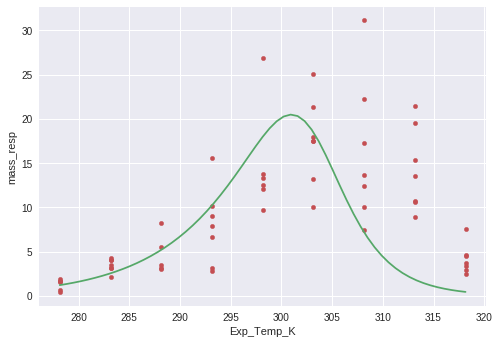

Round: 7 
The stream temp was:  13.9
AIC value: 222.20 
BIC value: 226.35 
Eh Parameter <Parameter 'Eh', value=3.4123755931788216 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.5254441920264661 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 57
    # data points      = 59
    # variables        = 2
    chi-square         = 3039.551
    reduced chi-square = 53.325
[[Variables]]
    mass_resp_coef:    1          +/- 0.024115 (2.41%) (init= 0.7997719)
    mass_resp_at_10:   2.41175045 +/- 0.950627 (39.42%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.525444 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.968

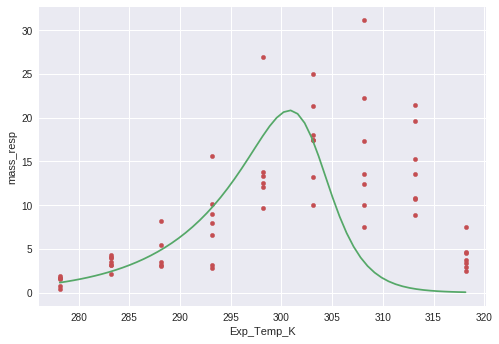

Round: 8 
The stream temp was:  13.9
AIC value: 238.61 
BIC value: 242.76 
Eh Parameter <Parameter 'Eh', value=4.5254441920264661 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.301899930673172 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 57
    # data points      = 59
    # variables        = 2
    chi-square         = 1320.582
    reduced chi-square = 23.168
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.014239 (1.42%) (init= 0.7997719)
    mass_resp_at_10:   2.58095339 +/- 0.503257 (19.50%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.3019 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.957 


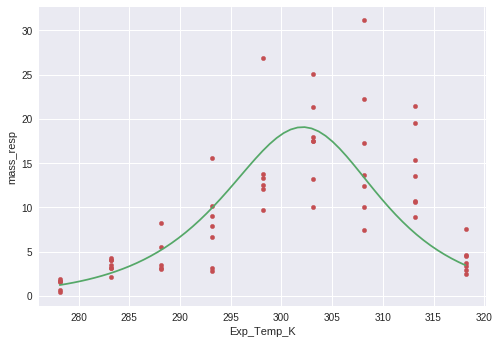

Round: 9 
The stream temp was:  13.9
AIC value: 189.42 
BIC value: 193.58 
Eh Parameter <Parameter 'Eh', value=2.301899930673172 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.1628113813782659 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 39
    # data points      = 59
    # variables        = 2
    chi-square         = 1656.134
    reduced chi-square = 29.055
[[Variables]]
    mass_resp_coef:    0.63649949 +/- 0.058579 (9.20%) (init= 0.7997719)
    mass_resp_at_10:   5.14938875 +/- 0.867770 (16.85%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.162811 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.923 

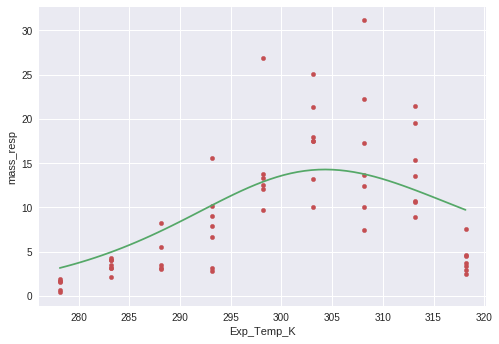

Round: 10 
The stream temp was:  13.9
AIC value: 202.78 
BIC value: 206.94 
Eh Parameter <Parameter 'Eh', value=1.1628113813782659 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.7940056319256446 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 46
    # data points      = 59
    # variables        = 2
    chi-square         = 1734.274
    reduced chi-square = 30.426
[[Variables]]
    mass_resp_coef:    0.99999993 +/- 0.098707 (9.87%) (init= 0.7997719)
    mass_resp_at_10:   2.61849766 +/- 0.627504 (23.96%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.794006 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.96

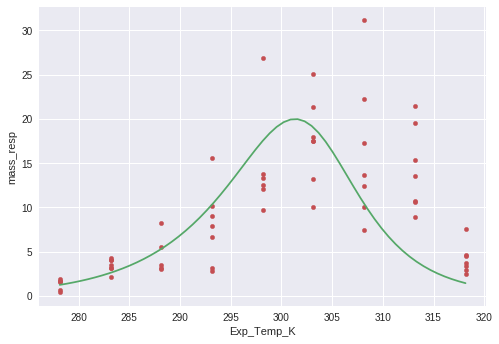

Round: 11 
The stream temp was:  13.9
AIC value: 205.50 
BIC value: 209.66 
Eh Parameter <Parameter 'Eh', value=2.7940056319256446 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.4965450103251943 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 54
    # data points      = 59
    # variables        = 2
    chi-square         = 1463.719
    reduced chi-square = 25.679
[[Variables]]
    mass_resp_coef:    1          +/- 0.002542 (0.25%) (init= 0.7997719)
    mass_resp_at_10:   2.61174275 +/- 0.549612 (21.04%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.496545 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.95

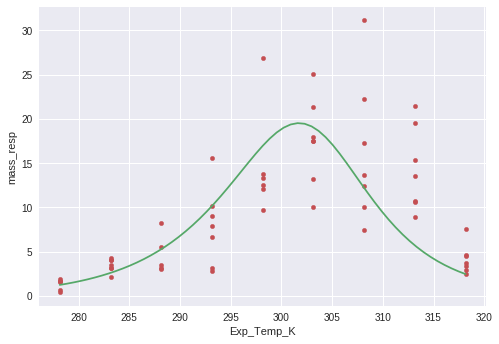

Round: 12 
The stream temp was:  13.9
AIC value: 195.50 
BIC value: 199.65 
Eh Parameter <Parameter 'Eh', value=2.4965450103251943 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.1312770099574223 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 51
    # data points      = 59
    # variables        = 2
    chi-square         = 2053.348
    reduced chi-square = 36.024
[[Variables]]
    mass_resp_coef:    0.99999984 +/- 0.114710 (11.47%) (init= 0.7997719)
    mass_resp_at_10:   2.59292092 +/- 0.712386 (27.47%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.131277 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.9

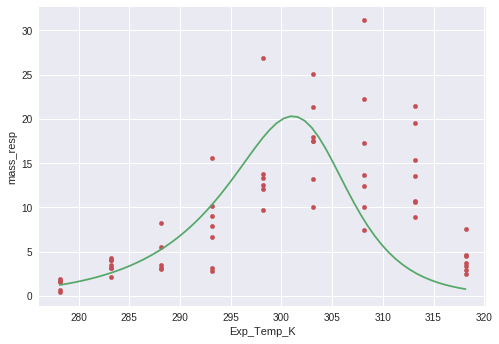

Round: 13 
The stream temp was:  13.9
AIC value: 215.47 
BIC value: 219.62 
Eh Parameter <Parameter 'Eh', value=3.1312770099574223 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.7963507581613261 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 48
    # data points      = 59
    # variables        = 2
    chi-square         = 3167.447
    reduced chi-square = 55.569
[[Variables]]
    mass_resp_coef:    0.99999977 +/- 18.10782 (1810.78%) (init= 0.7997719)
    mass_resp_at_10:   2.38035874 +/- 0.979583 (41.15%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.796351 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0

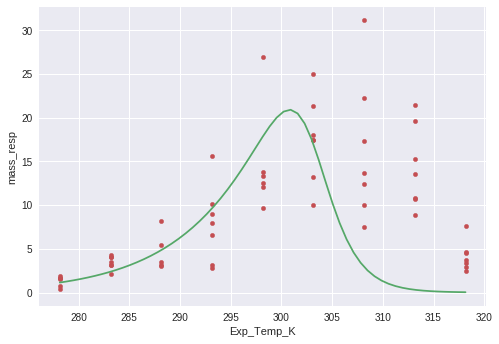

Round: 14 
The stream temp was:  13.9
AIC value: 241.04 
BIC value: 245.20 
Eh Parameter <Parameter 'Eh', value=4.7963507581613261 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.6529997697282424 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 24
    # data points      = 59
    # variables        = 2
    chi-square         = 1308.416
    reduced chi-square = 22.955
[[Variables]]
    mass_resp_coef:    0.84167936 +/- 0.060492 (7.19%) (init= 0.7997719)
    mass_resp_at_10:   3.45803777 +/- 0.588817 (17.03%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.653 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.944 


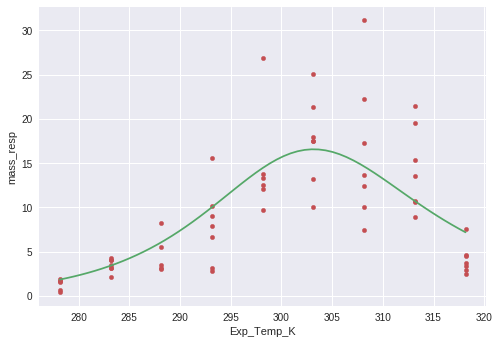

Round: 15 
The stream temp was:  13.9
AIC value: 188.88 
BIC value: 193.03 
Eh Parameter <Parameter 'Eh', value=1.6529997697282424 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.4030714273460667 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 48
    # data points      = 59
    # variables        = 2
    chi-square         = 2976.104
    reduced chi-square = 52.212
[[Variables]]
    mass_resp_coef:    1          +/- 0.001647 (0.16%) (init= 0.7997719)
    mass_resp_at_10:   2.42695284 +/- 0.936108 (38.57%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.403071 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.96

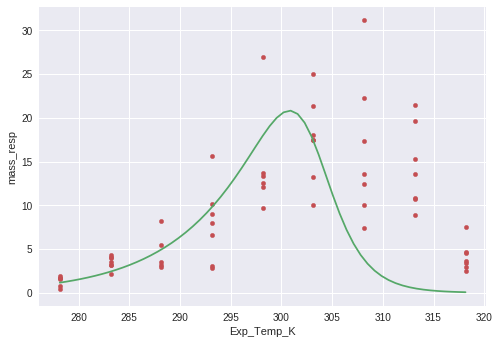

Round: 16 
The stream temp was:  13.9
AIC value: 237.36 
BIC value: 241.52 
Eh Parameter <Parameter 'Eh', value=4.4030714273460667 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.0249569663730416 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 54
    # data points      = 59
    # variables        = 2
    chi-square         = 1954.228
    reduced chi-square = 34.285
[[Variables]]
    mass_resp_coef:    1          +/- 0.052355 (5.24%) (init= 0.7997719)
    mass_resp_at_10:   2.60326965 +/- 0.686615 (26.38%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.024957 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.96

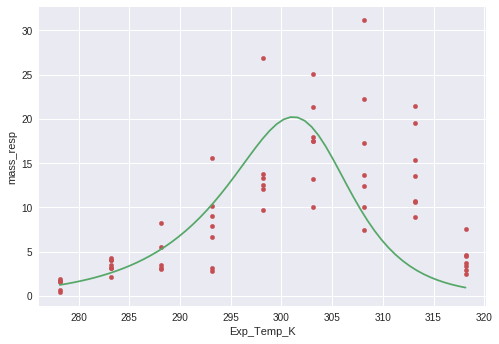

Round: 17 
The stream temp was:  13.9
AIC value: 212.55 
BIC value: 216.70 
Eh Parameter <Parameter 'Eh', value=3.0249569663730416 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.8765503876102994 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 54
    # data points      = 59
    # variables        = 2
    chi-square         = 1813.106
    reduced chi-square = 31.809
[[Variables]]
    mass_resp_coef:    1          +/- 0.059059 (5.91%) (init= 0.7997719)
    mass_resp_at_10:   2.61448689 +/- 0.648981 (24.82%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.87655 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.961

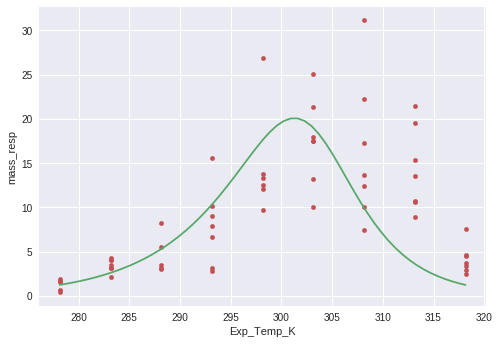

Round: 18 
The stream temp was:  13.9
AIC value: 208.12 
BIC value: 212.28 
Eh Parameter <Parameter 'Eh', value=2.8765503876102994 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.4611231279784658 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 58
    # data points      = 59
    # variables        = 2
    chi-square         = 2342.158
    reduced chi-square = 41.090
[[Variables]]
    mass_resp_coef:    0.99999994 +/- 0.131980 (13.20%) (init= 0.7997719)
    mass_resp_at_10:   2.55280836 +/- 0.785274 (30.76%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.461123 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.9

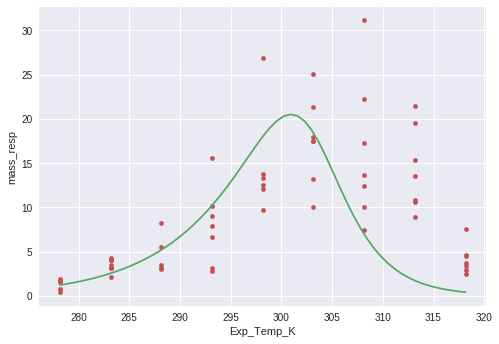

Round: 19 
The stream temp was:  13.9
AIC value: 223.23 
BIC value: 227.39 
Eh Parameter <Parameter 'Eh', value=3.4611231279784658 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.7325545194287391 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 26
    # data points      = 93
    # variables        = 2
    chi-square         = 4207.074
    reduced chi-square = 46.232
[[Variables]]
    mass_resp_coef:    0.93662695 +/- 0.063193 (6.75%) (init= 0.7997719)
    mass_resp_at_10:   4.41999033 +/- 0.675007 (15.27%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.732555 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.95

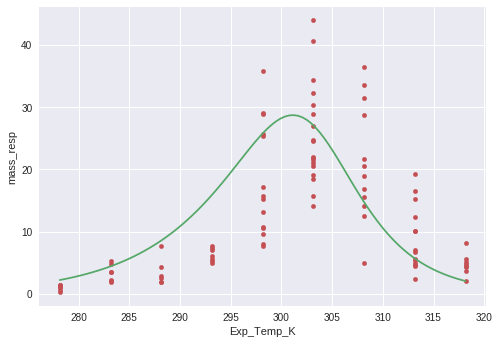

Round: 1 
The stream temp was:  14.4
AIC value: 360.53 
BIC value: 365.60 
Eh Parameter <Parameter 'Eh', value=2.7325545194287391 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.0790186416692298 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 39
    # data points      = 93
    # variables        = 2
    chi-square         = 6870.612
    reduced chi-square = 75.501
[[Variables]]
    mass_resp_coef:    0.48903999 +/- 0.050607 (10.35%) (init= 0.7997719)
    mass_resp_at_10:   10.0124771 +/- 1.332721 (13.31%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.079019 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.88

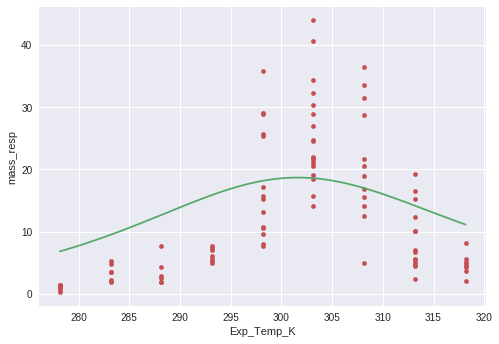

Round: 2 
The stream temp was:  14.4
AIC value: 406.15 
BIC value: 411.21 
Eh Parameter <Parameter 'Eh', value=1.0790186416692298 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.6095756329227466 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 29
    # data points      = 93
    # variables        = 2
    chi-square         = 4134.151
    reduced chi-square = 45.430
[[Variables]]
    mass_resp_coef:    0.91224613 +/- 0.060531 (6.64%) (init= 0.7997719)
    mass_resp_at_10:   4.65434465 +/- 0.683810 (14.69%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.609576 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.953

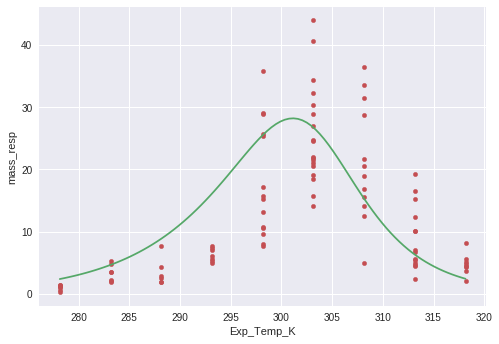

Round: 3 
The stream temp was:  14.4
AIC value: 358.90 
BIC value: 363.97 
Eh Parameter <Parameter 'Eh', value=2.6095756329227466 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.2082896987750678 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 34
    # data points      = 93
    # variables        = 2
    chi-square         = 4686.116
    reduced chi-square = 51.496
[[Variables]]
    mass_resp_coef:    0.99999998 +/- 0.081789 (8.18%) (init= 0.7997719)
    mass_resp_at_10:   3.84683209 +/- 0.682199 (17.73%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.20829 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.963 

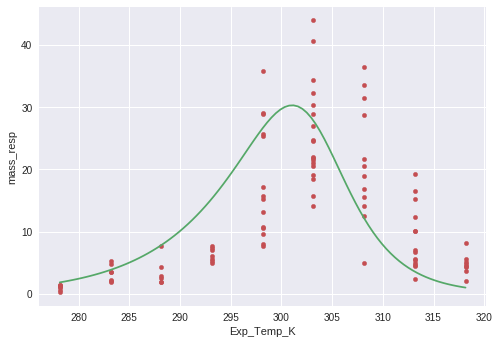

Round: 4 
The stream temp was:  14.4
AIC value: 370.56 
BIC value: 375.62 
Eh Parameter <Parameter 'Eh', value=3.2082896987750678 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.4093892907443655 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 30
    # data points      = 93
    # variables        = 2
    chi-square         = 6367.310
    reduced chi-square = 69.970
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.102326 (10.23%) (init= 0.7997719)
    mass_resp_at_10:   3.73208953 +/- 0.861167 (23.07%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.409389 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.96

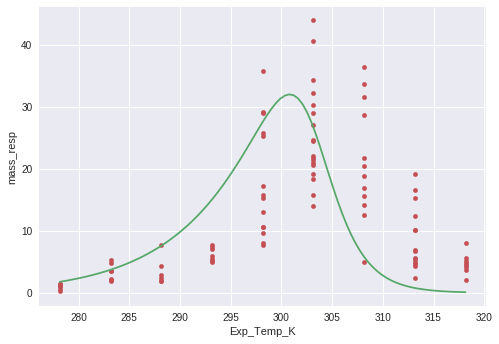

Round: 5 
The stream temp was:  14.4
AIC value: 399.07 
BIC value: 404.14 
Eh Parameter <Parameter 'Eh', value=4.4093892907443655 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.1753790113144302 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 24
    # data points      = 93
    # variables        = 2
    chi-square         = 4136.130
    reduced chi-square = 45.452
[[Variables]]
    mass_resp_coef:    0.81107762 +/- 0.053245 (6.56%) (init= 0.7997719)
    mass_resp_at_10:   5.71657467 +/- 0.751049 (13.14%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.175379 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.941

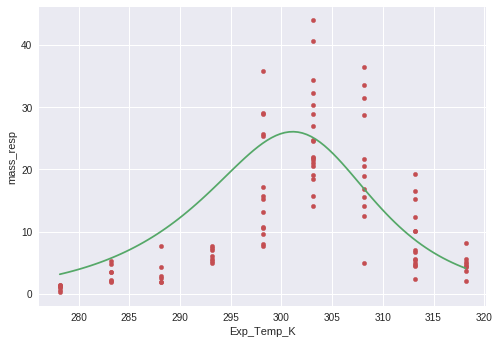

Round: 6 
The stream temp was:  14.4
AIC value: 358.95 
BIC value: 364.01 
Eh Parameter <Parameter 'Eh', value=2.1753790113144302 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.4383658102919146 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 18
    # data points      = 93
    # variables        = 2
    chi-square         = 4081.314
    reduced chi-square = 44.850
[[Variables]]
    mass_resp_coef:    0.87497428 +/- 0.057238 (6.54%) (init= 0.7997719)
    mass_resp_at_10:   5.02868998 +/- 0.702925 (13.98%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.438366 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.949

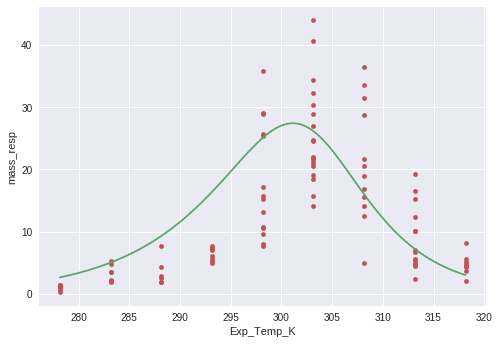

Round: 7 
The stream temp was:  14.4
AIC value: 357.71 
BIC value: 362.77 
Eh Parameter <Parameter 'Eh', value=2.4383658102919146 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.4459774981062798 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 93
    # variables        = 2
    chi-square         = 5466.459
    reduced chi-square = 60.071
[[Variables]]
    mass_resp_coef:    0.60378723 +/- 0.049336 (8.17%) (init= 0.7997719)
    mass_resp_at_10:   8.32852033 +/- 1.053850 (12.65%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.445977 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.910

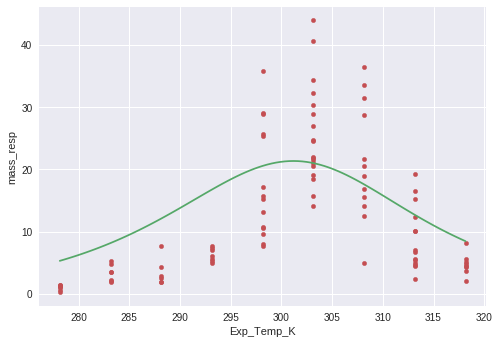

Round: 8 
The stream temp was:  14.4
AIC value: 384.88 
BIC value: 389.95 
Eh Parameter <Parameter 'Eh', value=1.4459774981062798 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.7580233438166797 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 15
    # data points      = 93
    # variables        = 2
    chi-square         = 4225.368
    reduced chi-square = 46.433
[[Variables]]
    mass_resp_coef:    0.94141033 +/- 0.063773 (6.77%) (init= 0.7997719)
    mass_resp_at_10:   4.37496138 +/- 0.673647 (15.40%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.758023 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.956

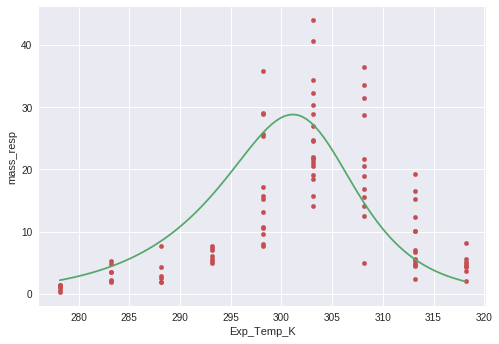

Round: 9 
The stream temp was:  14.4
AIC value: 360.93 
BIC value: 366.00 
Eh Parameter <Parameter 'Eh', value=2.7580233438166797 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.8771009131418497 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 24
    # data points      = 93
    # variables        = 2
    chi-square         = 4323.763
    reduced chi-square = 47.514
[[Variables]]
    mass_resp_coef:    0.96250379 +/- 0.066556 (6.91%) (init= 0.7997719)
    mass_resp_at_10:   4.17998360 +/- 0.669305 (16.01%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.877101 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.959

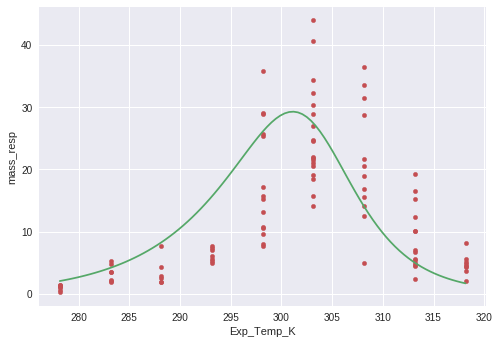

Round: 10 
The stream temp was:  14.4
AIC value: 363.08 
BIC value: 368.14 
Eh Parameter <Parameter 'Eh', value=2.8771009131418497 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=0.84394499129903733 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 43
    # data points      = 93
    # variables        = 2
    chi-square         = 7946.798
    reduced chi-square = 87.327
[[Variables]]
    mass_resp_coef:    0.41254605 +/- 0.052072 (12.62%) (init= 0.7997719)
    mass_resp_at_10:   11.2792786 +/- 1.572065 (13.94%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                0.843945 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.

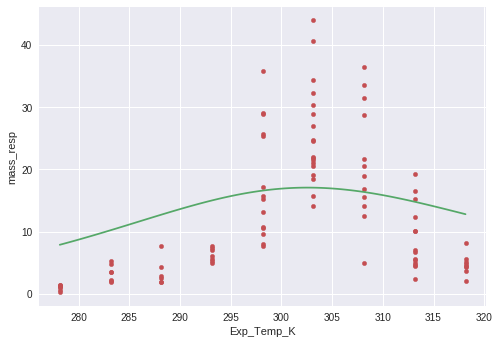

Round: 11 
The stream temp was:  14.4
AIC value: 419.68 
BIC value: 424.74 
Eh Parameter <Parameter 'Eh', value=0.84394499129903733 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.3262868994489008 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 31
    # data points      = 93
    # variables        = 2
    chi-square         = 4840.058
    reduced chi-square = 53.187
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.001668 (0.17%) (init= 0.7997719)
    mass_resp_at_10:   3.84403111 +/- 0.701363 (18.25%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.326287 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.9

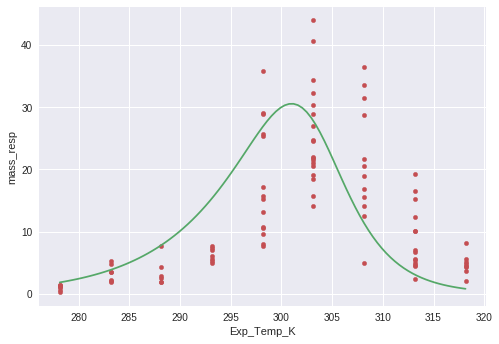

Round: 12 
The stream temp was:  14.4
AIC value: 373.57 
BIC value: 378.63 
Eh Parameter <Parameter 'Eh', value=3.3262868994489008 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.3201615760129162 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 93
    # variables        = 2
    chi-square         = 4083.535
    reduced chi-square = 44.874
[[Variables]]
    mass_resp_coef:    0.84718029 +/- 0.055271 (6.52%) (init= 0.7997719)
    mass_resp_at_10:   5.32073205 +/- 0.721492 (13.56%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.320162 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.94

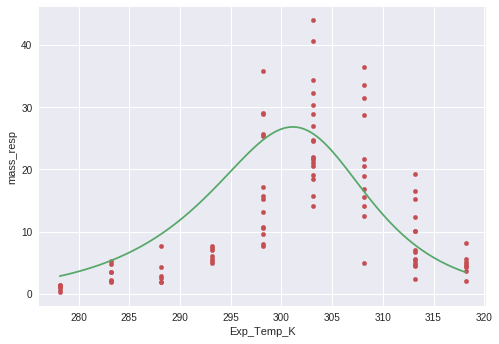

Round: 13 
The stream temp was:  14.4
AIC value: 357.76 
BIC value: 362.82 
Eh Parameter <Parameter 'Eh', value=2.3201615760129162 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.1007718678613445 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 31
    # data points      = 93
    # variables        = 2
    chi-square         = 5944.355
    reduced chi-square = 65.323
[[Variables]]
    mass_resp_coef:    0.99999997 +/- 0.080179 (8.02%) (init= 0.7997719)
    mass_resp_at_10:   3.77187428 +/- 0.820371 (21.75%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.100772 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.96

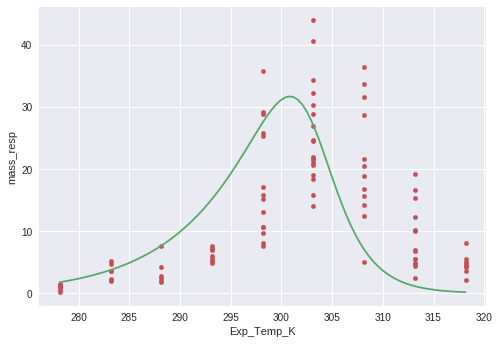

Round: 14 
The stream temp was:  14.4
AIC value: 392.68 
BIC value: 397.74 
Eh Parameter <Parameter 'Eh', value=4.1007718678613445 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.7983712175229671 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 21
    # data points      = 93
    # variables        = 2
    chi-square         = 4256.408
    reduced chi-square = 46.774
[[Variables]]
    mass_resp_coef:    0.94879362 +/- 0.064693 (6.82%) (init= 0.7997719)
    mass_resp_at_10:   4.30605627 +/- 0.671832 (15.60%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.798371 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.95

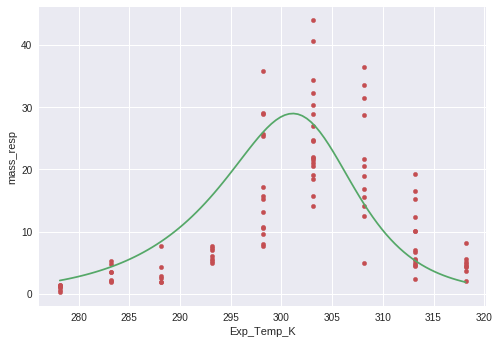

Round: 15 
The stream temp was:  14.4
AIC value: 361.61 
BIC value: 366.68 
Eh Parameter <Parameter 'Eh', value=2.7983712175229671 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=0.90579362654126749 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 33
    # data points      = 93
    # variables        = 2
    chi-square         = 7657.094
    reduced chi-square = 84.144
[[Variables]]
    mass_resp_coef:    0.43292808 +/- 0.051656 (11.93%) (init= 0.7997719)
    mass_resp_at_10:   10.9251151 +/- 1.503378 (13.76%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                0.9057936 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0

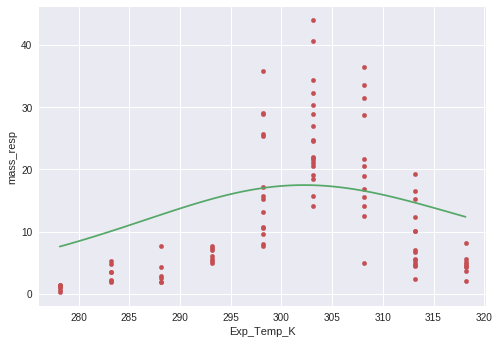

Round: 16 
The stream temp was:  14.4
AIC value: 416.23 
BIC value: 421.29 
Eh Parameter <Parameter 'Eh', value=0.90579362654126749 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.6290451964112496 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 35
    # data points      = 93
    # variables        = 2
    chi-square         = 4946.662
    reduced chi-square = 54.359
[[Variables]]
    mass_resp_coef:    0.65887725 +/- 0.049398 (7.50%) (init= 0.7997719)
    mass_resp_at_10:   7.58143952 +/- 0.949527 (12.52%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.629045 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.9

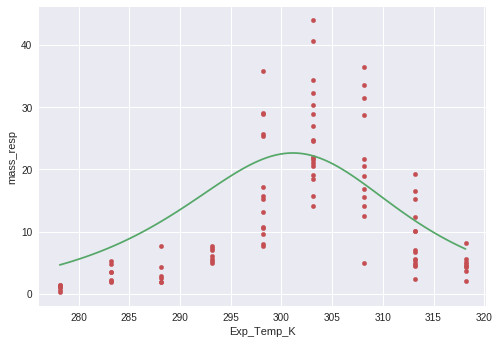

Round: 17 
The stream temp was:  14.4
AIC value: 375.59 
BIC value: 380.66 
Eh Parameter <Parameter 'Eh', value=1.6290451964112496 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.1827401045144224 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 39
    # data points      = 93
    # variables        = 2
    chi-square         = 6430.600
    reduced chi-square = 70.666
[[Variables]]
    mass_resp_coef:    0.52200330 +/- 0.050094 (9.60%) (init= 0.7997719)
    mass_resp_at_10:   9.50839430 +/- 1.243480 (13.08%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.18274 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.895

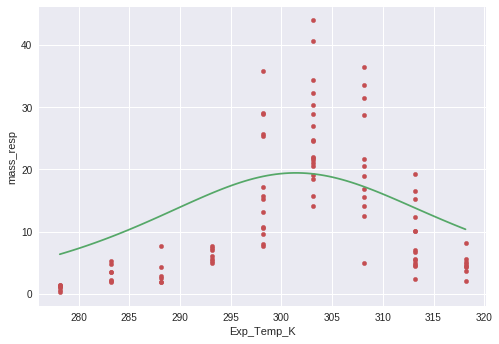

Round: 18 
The stream temp was:  14.4
AIC value: 399.99 
BIC value: 405.06 
Eh Parameter <Parameter 'Eh', value=1.1827401045144224 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.3674602177911774 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 43
    # data points      = 93
    # variables        = 2
    chi-square         = 5728.509
    reduced chi-square = 62.951
[[Variables]]
    mass_resp_coef:    0.57966105 +/- 0.049471 (8.53%) (init= 0.7997719)
    mass_resp_at_10:   8.66751814 +/- 1.105174 (12.75%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.36746 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.905

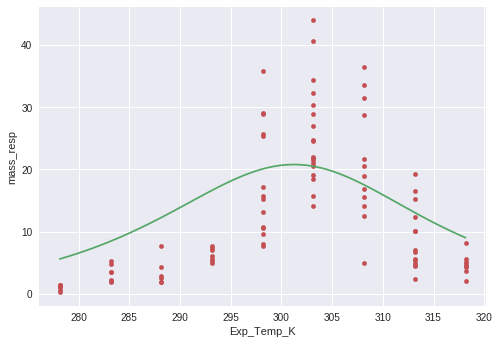

Round: 19 
The stream temp was:  14.4
AIC value: 389.24 
BIC value: 394.30 
Eh Parameter <Parameter 'Eh', value=1.3674602177911774 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.7880859274888181 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 74
    # variables        = 2
    chi-square         = 3174.035
    reduced chi-square = 44.084
[[Variables]]
    mass_resp_coef:    0.86443081 +/- 0.057696 (6.67%) (init= 0.7997719)
    mass_resp_at_10:   4.51574932 +/- 0.715930 (15.85%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.788086 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.94

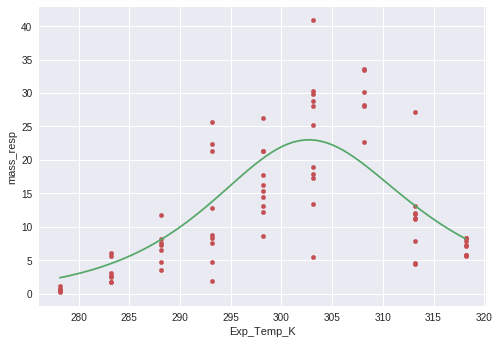

Round: 1 
The stream temp was:  19.3
AIC value: 284.17 
BIC value: 288.78 
Eh Parameter <Parameter 'Eh', value=1.7880859274888181 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.2384994429461784 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 66
    # data points      = 74
    # variables        = 2
    chi-square         = 6292.875
    reduced chi-square = 87.401
[[Variables]]
    mass_resp_coef:    0.99999998 +/- 2.333269 (233.33%) (init= 0.7997719)
    mass_resp_at_10:   3.35409134 +/- 1.072186 (31.97%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.238499 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.9

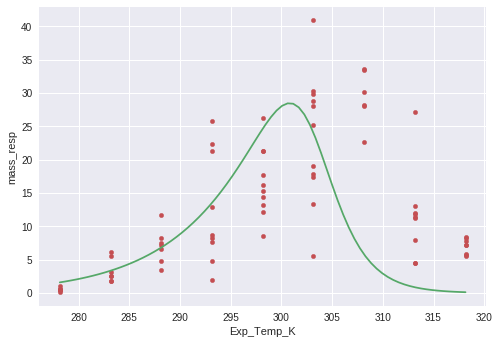

Round: 2 
The stream temp was:  19.3
AIC value: 334.82 
BIC value: 339.43 
Eh Parameter <Parameter 'Eh', value=4.2384994429461784 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.9927640373175626 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 58
    # data points      = 74
    # variables        = 2
    chi-square         = 4239.087
    reduced chi-square = 58.876
[[Variables]]
    mass_resp_coef:    1          +/- 0.034926 (3.49%) (init= 0.7997719)
    mass_resp_at_10:   3.54593373 +/- 0.799061 (22.53%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.992764 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.962

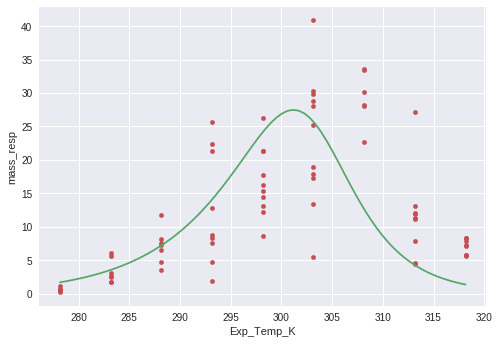

Round: 3 
The stream temp was:  19.3
AIC value: 305.58 
BIC value: 310.19 
Eh Parameter <Parameter 'Eh', value=2.9927640373175626 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.2848457789189531 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 43
    # data points      = 74
    # variables        = 2
    chi-square         = 3117.539
    reduced chi-square = 43.299
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.038041 (3.80%) (init= 0.7997719)
    mass_resp_at_10:   3.47429236 +/- 0.611546 (17.60%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.284846 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.957

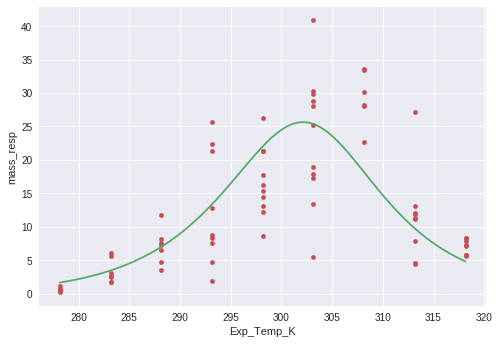

Round: 4 
The stream temp was:  19.3
AIC value: 282.84 
BIC value: 287.45 
Eh Parameter <Parameter 'Eh', value=2.2848457789189531 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.3426361021898492 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 36
    # data points      = 74
    # variables        = 2
    chi-square         = 3770.611
    reduced chi-square = 52.370
[[Variables]]
    mass_resp_coef:    0.68630733 +/- 0.054570 (7.95%) (init= 0.7997719)
    mass_resp_at_10:   6.39629052 +/- 0.979540 (15.31%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.342636 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.927

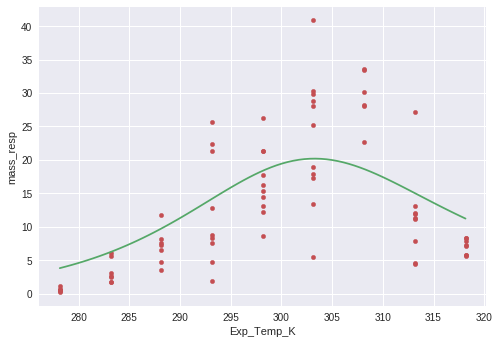

Round: 5 
The stream temp was:  19.3
AIC value: 296.92 
BIC value: 301.52 
Eh Parameter <Parameter 'Eh', value=1.3426361021898492 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.4210604184122486 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 37
    # data points      = 74
    # variables        = 2
    chi-square         = 3628.330
    reduced chi-square = 50.393
[[Variables]]
    mass_resp_coef:    0.71701543 +/- 0.054794 (7.64%) (init= 0.7997719)
    mass_resp_at_10:   6.03884661 +/- 0.924489 (15.31%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.42106 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.930 

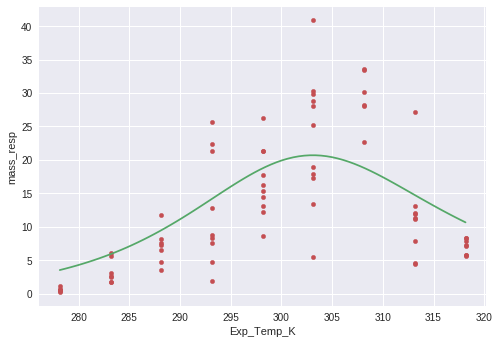

Round: 6 
The stream temp was:  19.3
AIC value: 294.07 
BIC value: 298.68 
Eh Parameter <Parameter 'Eh', value=1.4210604184122486 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.9350271863173187 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 60
    # data points      = 74
    # variables        = 2
    chi-square         = 4129.121
    reduced chi-square = 57.349
[[Variables]]
    mass_resp_coef:    1          +/- 0.065809 (6.58%) (init= 0.7997719)
    mass_resp_at_10:   3.55024369 +/- 0.783015 (22.06%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.935027 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.961

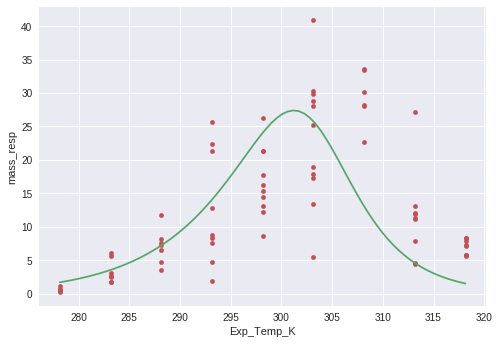

Round: 7 
The stream temp was:  19.3
AIC value: 303.64 
BIC value: 308.25 
Eh Parameter <Parameter 'Eh', value=2.9350271863173187 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.3044917117722701 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 59
    # data points      = 74
    # variables        = 2
    chi-square         = 4825.865
    reduced chi-square = 67.026
[[Variables]]
    mass_resp_coef:    1          +/- 0.055936 (5.59%) (init= 0.7997719)
    mass_resp_at_10:   3.50969346 +/- 0.881851 (25.13%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.304492 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.963

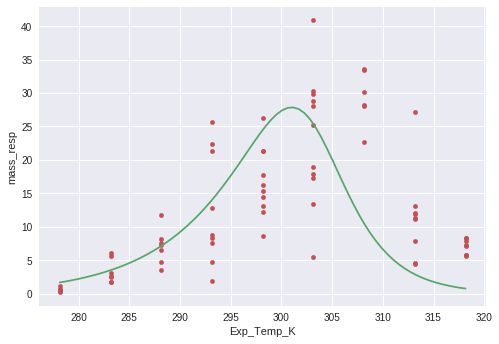

Round: 8 
The stream temp was:  19.3
AIC value: 315.18 
BIC value: 319.78 
Eh Parameter <Parameter 'Eh', value=3.3044917117722701 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.8070555344416721 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 25
    # data points      = 74
    # variables        = 2
    chi-square         = 3159.895
    reduced chi-square = 43.887
[[Variables]]
    mass_resp_coef:    0.87223064 +/- 0.057900 (6.64%) (init= 0.7997719)
    mass_resp_at_10:   4.44390646 +/- 0.707253 (15.92%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.807056 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.946

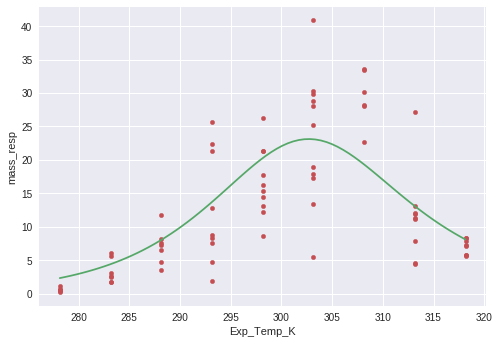

Round: 9 
The stream temp was:  19.3
AIC value: 283.84 
BIC value: 288.45 
Eh Parameter <Parameter 'Eh', value=1.8070555344416721 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.7540380084701406 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 50
    # data points      = 74
    # variables        = 2
    chi-square         = 6887.775
    reduced chi-square = 95.664
[[Variables]]
    mass_resp_coef:    0.99999984 +/- 1.998687 (199.87%) (init= 0.7997719)
    mass_resp_at_10:   3.27169514 +/- 1.144469 (34.98%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.754038 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.9

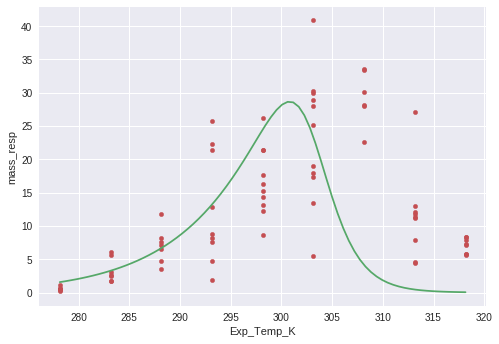

Round: 10 
The stream temp was:  19.3
AIC value: 341.50 
BIC value: 346.11 
Eh Parameter <Parameter 'Eh', value=4.7540380084701406 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.2827155123323877 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 150
    # data points      = 74
    # variables        = 2
    chi-square         = 6349.462
    reduced chi-square = 88.187
[[Variables]]
    mass_resp_coef:    1          +/- 6.45e-05 (0.01%) (init= 0.7997719)
    mass_resp_at_10:   3.34651903 +/- 1.079165 (32.25%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.282716 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.9

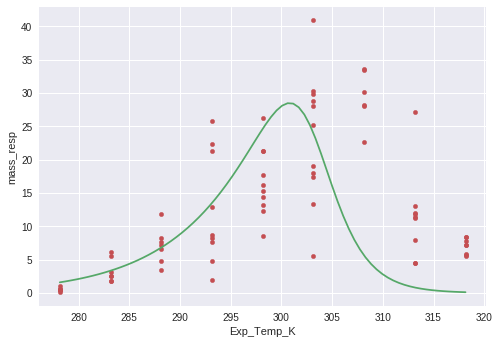

Round: 11 
The stream temp was:  19.3
AIC value: 335.48 
BIC value: 340.09 
Eh Parameter <Parameter 'Eh', value=4.2827155123323877 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.460922818348855 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 37
    # data points      = 74
    # variables        = 2
    chi-square         = 3562.054
    reduced chi-square = 49.473
[[Variables]]
    mass_resp_coef:    0.73277203 +/- 0.054938 (7.50%) (init= 0.7997719)
    mass_resp_at_10:   5.86070515 +/- 0.898302 (15.33%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.460923 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.932

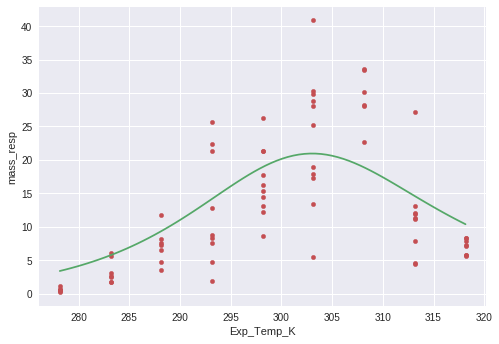

Round: 12 
The stream temp was:  19.3
AIC value: 292.71 
BIC value: 297.31 
Eh Parameter <Parameter 'Eh', value=1.460922818348855 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.3453886753629889 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 36
    # data points      = 74
    # variables        = 2
    chi-square         = 3765.354
    reduced chi-square = 52.297
[[Variables]]
    mass_resp_coef:    0.68737606 +/- 0.054577 (7.94%) (init= 0.7997719)
    mass_resp_at_10:   6.38363437 +/- 0.977513 (15.31%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.345389 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.927

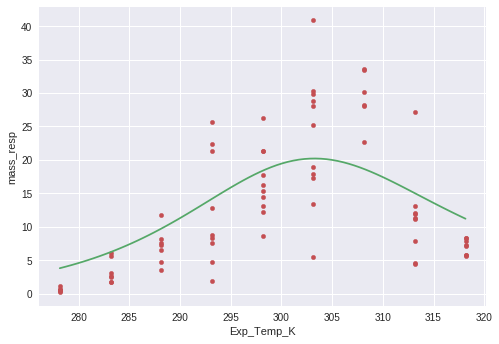

Round: 13 
The stream temp was:  19.3
AIC value: 296.81 
BIC value: 301.42 
Eh Parameter <Parameter 'Eh', value=1.3453886753629889 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.6050623049331136 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 44
    # data points      = 74
    # variables        = 2
    chi-square         = 6729.840
    reduced chi-square = 93.470
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.011602 (1.16%) (init= 0.7997719)
    mass_resp_at_10:   3.29451987 +/- 1.125514 (34.16%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.605062 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.96

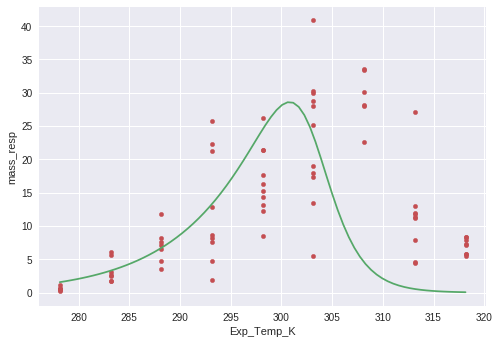

Round: 14 
The stream temp was:  19.3
AIC value: 339.79 
BIC value: 344.39 
Eh Parameter <Parameter 'Eh', value=4.6050623049331136 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.6224965023746059 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 50
    # data points      = 74
    # variables        = 2
    chi-square         = 6748.878
    reduced chi-square = 93.734
[[Variables]]
    mass_resp_coef:    1          +/- 0.004709 (0.47%) (init= 0.7997719)
    mass_resp_at_10:   3.29165240 +/- 1.127878 (34.26%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.622497 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.96

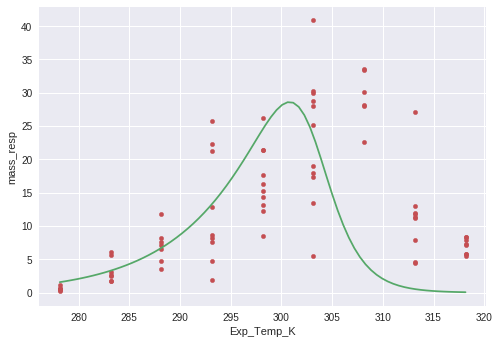

Round: 15 
The stream temp was:  19.3
AIC value: 339.99 
BIC value: 344.60 
Eh Parameter <Parameter 'Eh', value=4.6224965023746059 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.902785316683862 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 83
    # data points      = 74
    # variables        = 2
    chi-square         = 5825.825
    reduced chi-square = 80.914
[[Variables]]
    mass_resp_coef:    0.99999970 +/- 0.129394 (12.94%) (init= 0.7997719)
    mass_resp_at_10:   3.41153390 +/- 1.013630 (29.71%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.902785 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.96

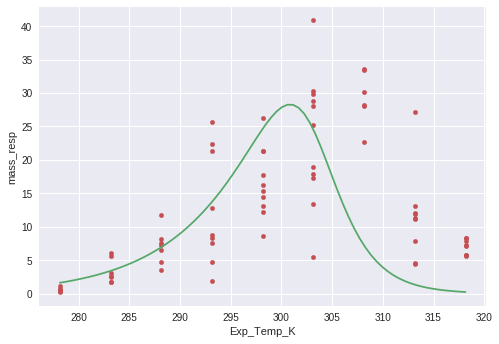

Round: 16 
The stream temp was:  19.3
AIC value: 329.11 
BIC value: 333.72 
Eh Parameter <Parameter 'Eh', value=3.902785316683862 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=0.95287194257813967 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 40
    # data points      = 74
    # variables        = 2
    chi-square         = 4683.477
    reduced chi-square = 65.048
[[Variables]]
    mass_resp_coef:    0.53699955 +/- 0.055051 (10.25%) (init= 0.7997719)
    mass_resp_at_10:   8.35475092 +/- 1.320757 (15.81%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                0.9528719 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.

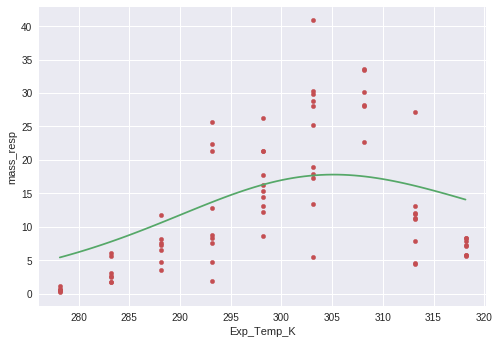

Round: 17 
The stream temp was:  19.3
AIC value: 312.96 
BIC value: 317.57 
Eh Parameter <Parameter 'Eh', value=0.95287194257813967 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.5208242409176309 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 21
    # data points      = 74
    # variables        = 2
    chi-square         = 3470.232
    reduced chi-square = 48.198
[[Variables]]
    mass_resp_coef:    0.75653133 +/- 0.055240 (7.30%) (init= 0.7997719)
    mass_resp_at_10:   5.59923609 +/- 0.860511 (15.37%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.520824 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.9

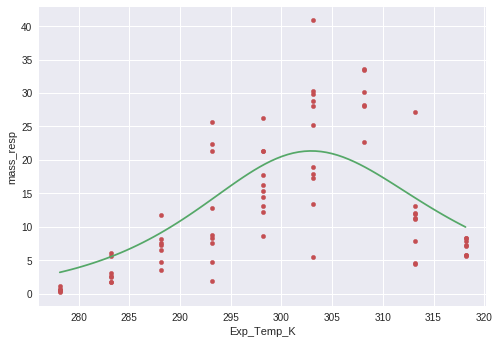

Round: 18 
The stream temp was:  19.3
AIC value: 290.77 
BIC value: 295.38 
Eh Parameter <Parameter 'Eh', value=1.5208242409176309 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.802120927453839 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 33
    # data points      = 74
    # variables        = 2
    chi-square         = 3163.488
    reduced chi-square = 43.937
[[Variables]]
    mass_resp_coef:    0.87021697 +/- 0.057814 (6.64%) (init= 0.7997719)
    mass_resp_at_10:   4.46232905 +/- 0.709668 (15.90%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.802121 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.946

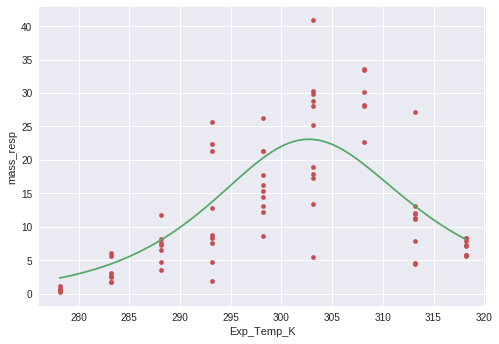

Round: 19 
The stream temp was:  19.3
AIC value: 283.92 
BIC value: 288.53 
Eh Parameter <Parameter 'Eh', value=1.802120927453839 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.8667490632979673 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 20
    # data points      = 83
    # variables        = 2
    chi-square         = 4554.827
    reduced chi-square = 56.232
[[Variables]]
    mass_resp_coef:    0.74949632 +/- 0.108087 (14.42%) (init= 0.7997719)
    mass_resp_at_10:   4.87019798 +/- 1.102234 (22.63%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.866749 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.95

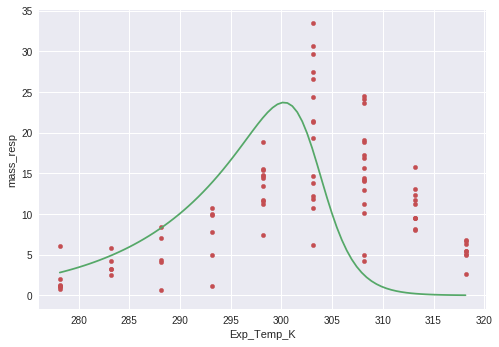

Round: 1 
The stream temp was:  5.6
AIC value: 338.45 
BIC value: 343.29 
Eh Parameter <Parameter 'Eh', value=4.8667490632979673 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.7357628282429995 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 24
    # data points      = 83
    # variables        = 2
    chi-square         = 2264.795
    reduced chi-square = 27.960
[[Variables]]
    mass_resp_coef:    0.66360978 +/- 0.046791 (7.05%) (init= 0.7997719)
    mass_resp_at_10:   6.24899131 +/- 0.724489 (11.59%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.735763 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.920 

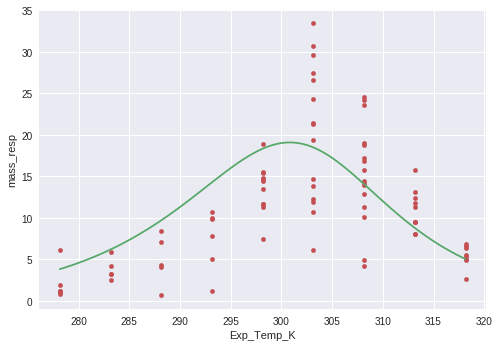

Round: 2 
The stream temp was:  5.6
AIC value: 280.46 
BIC value: 285.29 
Eh Parameter <Parameter 'Eh', value=1.7357628282429995 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.8035404221960176 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 20
    # data points      = 83
    # variables        = 2
    chi-square         = 4521.377
    reduced chi-square = 55.819
[[Variables]]
    mass_resp_coef:    0.75300863 +/- 0.107505 (14.28%) (init= 0.7997719)
    mass_resp_at_10:   4.84693006 +/- 1.093768 (22.57%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.80354 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.950 

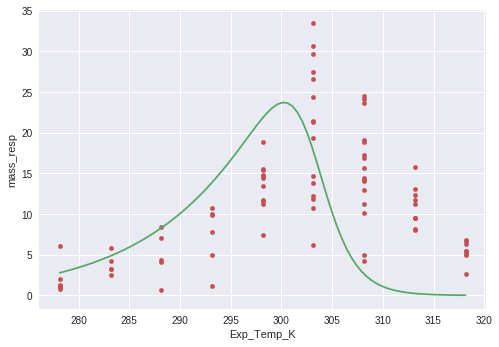

Round: 3 
The stream temp was:  5.6
AIC value: 337.84 
BIC value: 342.67 
Eh Parameter <Parameter 'Eh', value=4.8035404221960176 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.1286525720931246 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 18
    # data points      = 83
    # variables        = 2
    chi-square         = 4102.343
    reduced chi-square = 50.646
[[Variables]]
    mass_resp_coef:    0.79369115 +/- 0.100330 (12.64%) (init= 0.7997719)
    mass_resp_at_10:   4.58041271 +/- 0.985780 (21.52%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.128653 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.952

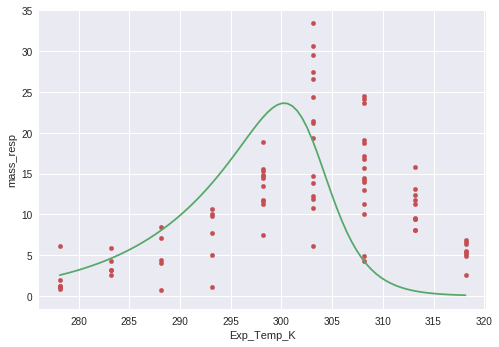

Round: 4 
The stream temp was:  5.6
AIC value: 329.76 
BIC value: 334.60 
Eh Parameter <Parameter 'Eh', value=4.1286525720931246 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.7066999030741243 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 24
    # data points      = 83
    # variables        = 2
    chi-square         = 3772.909
    reduced chi-square = 46.579
[[Variables]]
    mass_resp_coef:    0.81895061 +/- 0.093699 (11.44%) (init= 0.7997719)
    mass_resp_at_10:   4.42305939 +/- 0.906019 (20.48%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.7067 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.953 


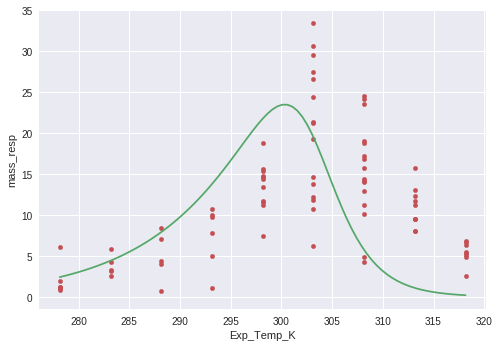

Round: 5 
The stream temp was:  5.6
AIC value: 322.82 
BIC value: 327.65 
Eh Parameter <Parameter 'Eh', value=3.7066999030741243 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.3431699756428497 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 83
    # variables        = 2
    chi-square         = 3444.410
    reduced chi-square = 42.524
[[Variables]]
    mass_resp_coef:    0.83510378 +/- 0.086194 (10.32%) (init= 0.7997719)
    mass_resp_at_10:   4.33665812 +/- 0.833994 (19.23%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.34317 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.952 

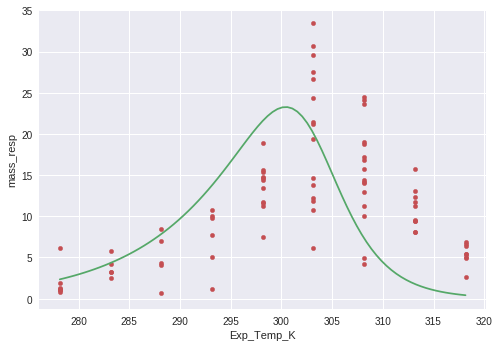

Round: 6 
The stream temp was:  5.6
AIC value: 315.25 
BIC value: 320.09 
Eh Parameter <Parameter 'Eh', value=3.3431699756428497 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.0825930521772313 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 32
    # data points      = 83
    # variables        = 2
    chi-square         = 2855.673
    reduced chi-square = 35.255
[[Variables]]
    mass_resp_coef:    0.48096050 +/- 0.043317 (9.01%) (init= 0.7997719)
    mass_resp_at_10:   8.60159475 +/- 0.971705 (11.30%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.082593 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.886 

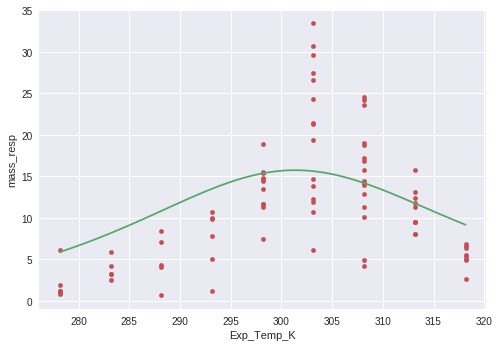

Round: 7 
The stream temp was:  5.6
AIC value: 299.70 
BIC value: 304.53 
Eh Parameter <Parameter 'Eh', value=1.0825930521772313 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.521324553795977 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 21
    # data points      = 83
    # variables        = 2
    chi-square         = 4360.687
    reduced chi-square = 53.836
[[Variables]]
    mass_resp_coef:    0.76947511 +/- 0.104916 (13.63%) (init= 0.7997719)
    mass_resp_at_10:   4.73803222 +/- 1.051790 (22.20%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.521325 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.951 

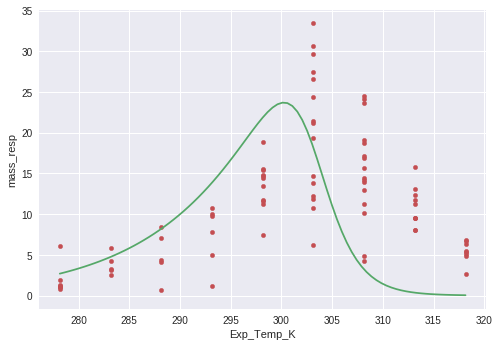

Round: 8 
The stream temp was:  5.6
AIC value: 334.83 
BIC value: 339.67 
Eh Parameter <Parameter 'Eh', value=4.521324553795977 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.4412665507873639 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 21
    # data points      = 83
    # variables        = 2
    chi-square         = 4311.482
    reduced chi-square = 53.228
[[Variables]]
    mass_resp_coef:    0.77432553 +/- 0.104089 (13.44%) (init= 0.7997719)
    mass_resp_at_10:   4.70616049 +/- 1.039025 (22.08%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.441267 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.951 

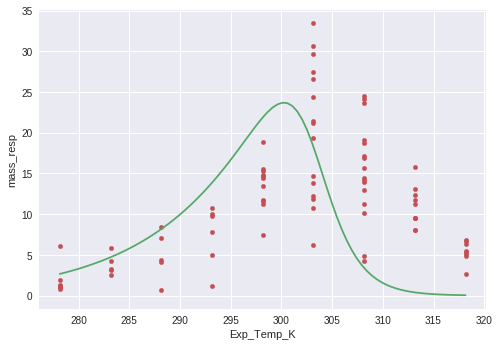

Round: 9 
The stream temp was:  5.6
AIC value: 333.89 
BIC value: 338.73 
Eh Parameter <Parameter 'Eh', value=4.4412665507873639 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.8559399367020672 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 24
    # data points      = 83
    # variables        = 2
    chi-square         = 2959.854
    reduced chi-square = 36.541
[[Variables]]
    mass_resp_coef:    0.83441236 +/- 0.073642 (8.83%) (init= 0.7997719)
    mass_resp_at_10:   4.40704506 +/- 0.746510 (16.94%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.85594 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.949 


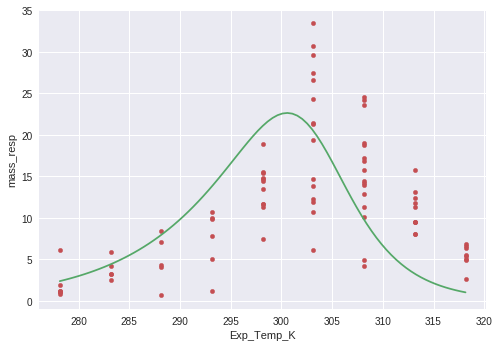

Round: 10 
The stream temp was:  5.6
AIC value: 302.67 
BIC value: 307.51 
Eh Parameter <Parameter 'Eh', value=2.8559399367020672 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.1925679918156695 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 54
    # data points      = 83
    # variables        = 2
    chi-square         = 2685.996
    reduced chi-square = 33.160
[[Variables]]
    mass_resp_coef:    0.51404907 +/- 0.043233 (8.41%) (init= 0.7997719)
    mass_resp_at_10:   8.13923739 +/- 0.909348 (11.17%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.192568 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.892

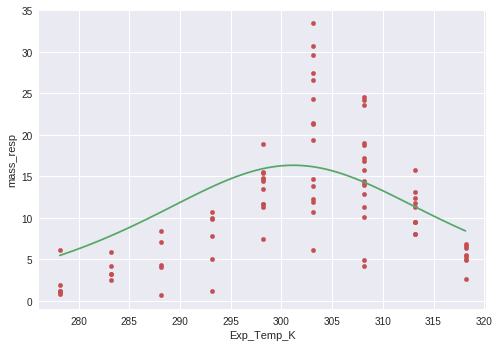

Round: 11 
The stream temp was:  5.6
AIC value: 294.61 
BIC value: 299.45 
Eh Parameter <Parameter 'Eh', value=1.1925679918156695 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.4983960792452455 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 31
    # data points      = 83
    # variables        = 2
    chi-square         = 3589.447
    reduced chi-square = 44.314
[[Variables]]
    mass_resp_coef:    0.82930958 +/- 0.089624 (10.81%) (init= 0.7997719)
    mass_resp_at_10:   4.36429724 +/- 0.864661 (19.81%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.498396 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.95

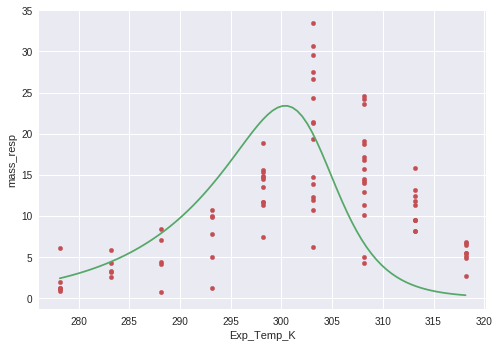

Round: 12 
The stream temp was:  5.6
AIC value: 318.68 
BIC value: 323.52 
Eh Parameter <Parameter 'Eh', value=3.4983960792452455 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.38033527234938 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 15
    # data points      = 83
    # variables        = 2
    chi-square         = 4272.885
    reduced chi-square = 52.752
[[Variables]]
    mass_resp_coef:    0.77801457 +/- 0.103350 (13.28%) (init= 0.7997719)
    mass_resp_at_10:   4.68213075 +/- 1.029434 (21.99%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.380335 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.951 

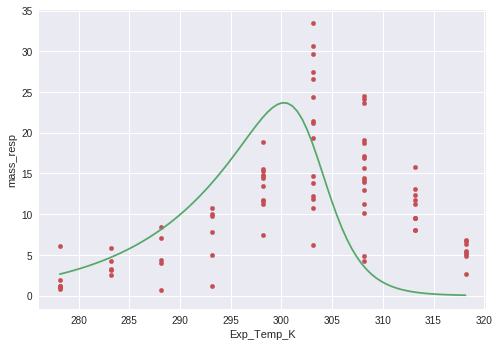

Round: 13 
The stream temp was:  5.6
AIC value: 333.14 
BIC value: 337.98 
Eh Parameter <Parameter 'Eh', value=4.38033527234938 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.2539740321237838 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 83
    # variables        = 2
    chi-square         = 2603.117
    reduced chi-square = 32.137
[[Variables]]
    mass_resp_coef:    0.53218740 +/- 0.043285 (8.13%) (init= 0.7997719)
    mass_resp_at_10:   7.89357692 +/- 0.878648 (11.13%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.253974 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.896 


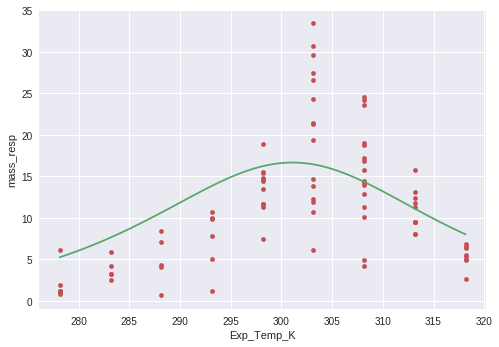

Round: 14 
The stream temp was:  5.6
AIC value: 292.01 
BIC value: 296.85 
Eh Parameter <Parameter 'Eh', value=1.2539740321237838 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.0205227913126587 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 18
    # data points      = 83
    # variables        = 2
    chi-square         = 2962.561
    reduced chi-square = 36.575
[[Variables]]
    mass_resp_coef:    0.46197796 +/- 0.043453 (9.41%) (init= 0.7997719)
    mass_resp_at_10:   8.87622071 +/- 1.011407 (11.39%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.020523 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.883

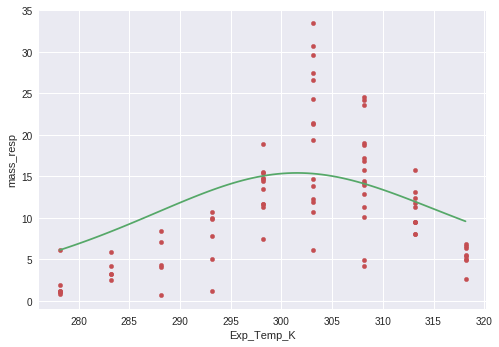

Round: 15 
The stream temp was:  5.6
AIC value: 302.75 
BIC value: 307.58 
Eh Parameter <Parameter 'Eh', value=1.0205227913126587 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.9219665146273881 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 21
    # data points      = 83
    # variables        = 2
    chi-square         = 3026.409
    reduced chi-square = 37.363
[[Variables]]
    mass_resp_coef:    0.83676237 +/- 0.075518 (9.03%) (init= 0.7997719)
    mass_resp_at_10:   4.37835999 +/- 0.756698 (17.28%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.921967 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.950

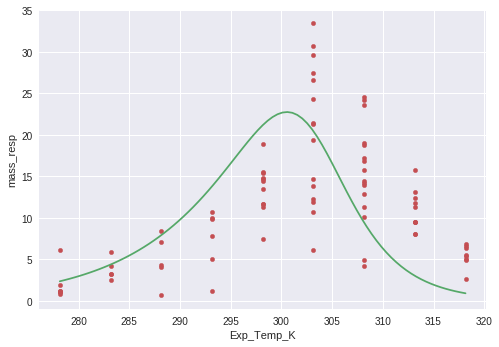

Round: 16 
The stream temp was:  5.6
AIC value: 304.52 
BIC value: 309.35 
Eh Parameter <Parameter 'Eh', value=2.9219665146273881 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.8900257684531736 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 24
    # data points      = 83
    # variables        = 2
    chi-square         = 4566.925
    reduced chi-square = 56.382
[[Variables]]
    mass_resp_coef:    0.74820288 +/- 0.108256 (14.47%) (init= 0.7997719)
    mass_resp_at_10:   4.87881989 +/- 1.105487 (22.66%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.890026 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.95

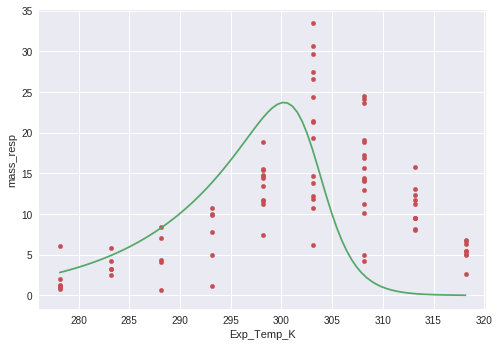

Round: 17 
The stream temp was:  5.6
AIC value: 338.67 
BIC value: 343.51 
Eh Parameter <Parameter 'Eh', value=4.8900257684531736 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.3301870224784587 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 18
    # data points      = 83
    # variables        = 2
    chi-square         = 2478.691
    reduced chi-square = 30.601
[[Variables]]
    mass_resp_coef:    0.78446198 +/- 0.059009 (7.52%) (init= 0.7997719)
    mass_resp_at_10:   4.92550239 +/- 0.691446 (14.04%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.330187 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.940

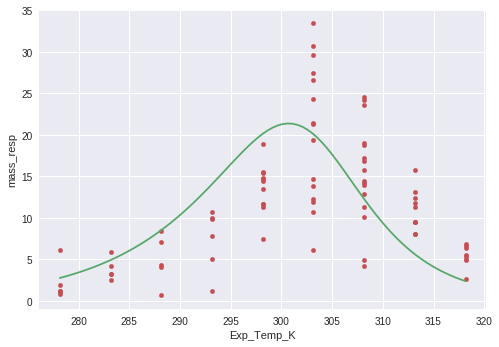

Round: 18 
The stream temp was:  5.6
AIC value: 287.95 
BIC value: 292.78 
Eh Parameter <Parameter 'Eh', value=2.3301870224784587 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.7615107228182354 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 15
    # data points      = 83
    # variables        = 2
    chi-square         = 2261.597
    reduced chi-square = 27.921
[[Variables]]
    mass_resp_coef:    0.66996453 +/- 0.047146 (7.04%) (init= 0.7997719)
    mass_resp_at_10:   6.17500685 +/- 0.720057 (11.66%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.761511 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.921

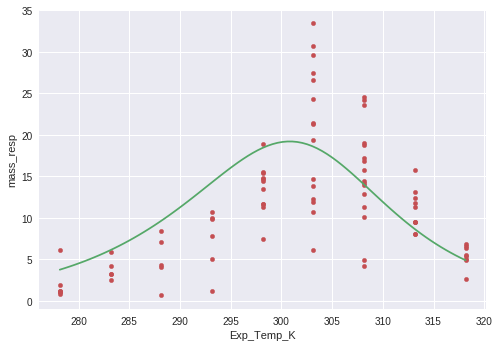

Round: 19 
The stream temp was:  5.6
AIC value: 280.34 
BIC value: 285.18 
Eh Parameter <Parameter 'Eh', value=1.7615107228182354 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.0596057310965712 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 39
    # data points      = 49
    # variables        = 2
    chi-square         = 2113.076
    reduced chi-square = 44.959
[[Variables]]
    mass_resp_coef:    0.99999996 +/- 0.074565 (7.46%) (init= 0.7997719)
    mass_resp_at_10:   4.13270013 +/- 0.867524 (20.99%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.059606 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.962

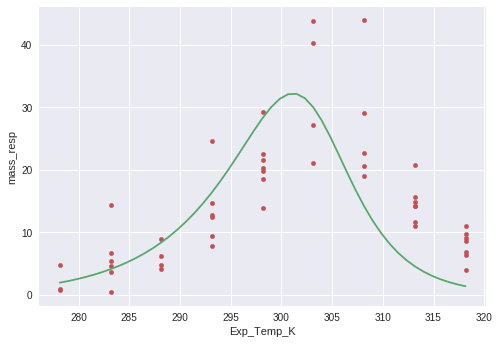

Round: 1 
The stream temp was:  8.1
AIC value: 190.48 
BIC value: 194.27 
Eh Parameter <Parameter 'Eh', value=3.0596057310965712 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.7053782545553222 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 43
    # data points      = 49
    # variables        = 2
    chi-square         = 3360.664
    reduced chi-square = 71.503
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.049201 (4.92%) (init= 0.7997719)
    mass_resp_at_10:   3.98594298 +/- 1.217425 (30.54%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.705378 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.969 

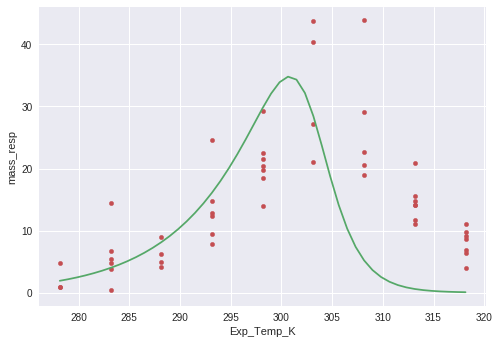

Round: 2 
The stream temp was:  8.1
AIC value: 213.22 
BIC value: 217.00 
Eh Parameter <Parameter 'Eh', value=4.7053782545553222 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.4709861702514129 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 44
    # data points      = 49
    # variables        = 2
    chi-square         = 2450.230
    reduced chi-square = 52.133
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.099178 (9.92%) (init= 0.7997719)
    mass_resp_at_10:   4.12113081 +/- 0.972795 (23.61%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.470986 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.964 

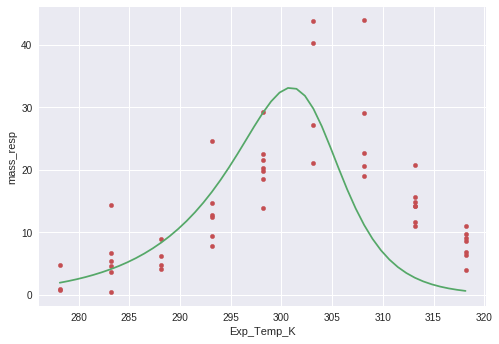

Round: 3 
The stream temp was:  8.1
AIC value: 197.74 
BIC value: 201.52 
Eh Parameter <Parameter 'Eh', value=3.4709861702514129 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.6015601065668625 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 21
    # data points      = 49
    # variables        = 2
    chi-square         = 1839.737
    reduced chi-square = 39.143
[[Variables]]
    mass_resp_coef:    0.99633012 +/- 0.073107 (7.34%) (init= 0.7997719)
    mass_resp_at_10:   4.10731072 +/- 0.764114 (18.60%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.60156 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.959 


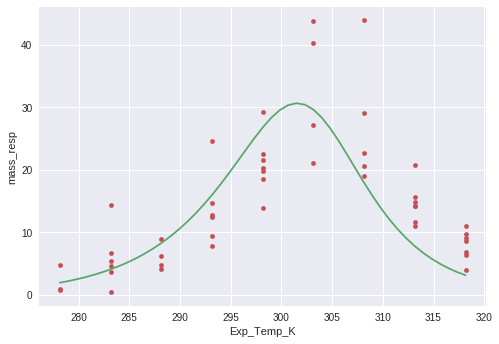

Round: 4 
The stream temp was:  8.1
AIC value: 183.69 
BIC value: 187.48 
Eh Parameter <Parameter 'Eh', value=2.6015601065668625 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.0952362101590571 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 37
    # data points      = 49
    # variables        = 2
    chi-square         = 2947.578
    reduced chi-square = 62.714
[[Variables]]
    mass_resp_coef:    0.99999993 +/- 0.119924 (11.99%) (init= 0.7997719)
    mass_resp_at_10:   4.05933060 +/- 1.111538 (27.38%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.095236 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.967

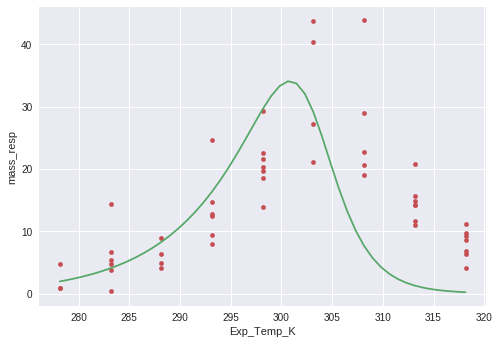

Round: 5 
The stream temp was:  8.1
AIC value: 206.79 
BIC value: 210.57 
Eh Parameter <Parameter 'Eh', value=4.0952362101590571 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.3886603554890291 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 46
    # data points      = 49
    # variables        = 2
    chi-square         = 3156.004
    reduced chi-square = 67.149
[[Variables]]
    mass_resp_coef:    1          +/- 0.002058 (0.21%) (init= 0.7997719)
    mass_resp_at_10:   4.02430963 +/- 1.165871 (28.97%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.38866 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.968 


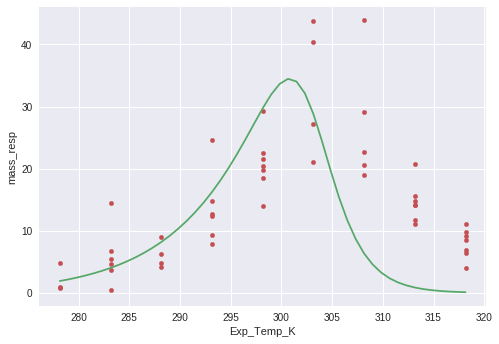

Round: 6 
The stream temp was:  8.1
AIC value: 210.14 
BIC value: 213.92 
Eh Parameter <Parameter 'Eh', value=4.3886603554890291 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.9262102567845121 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 35
    # data points      = 49
    # variables        = 2
    chi-square         = 2014.423
    reduced chi-square = 42.860
[[Variables]]
    mass_resp_coef:    0.99999990 +/- 0.216419 (21.64%) (init= 0.7997719)
    mass_resp_at_10:   4.12581667 +/- 0.833290 (20.20%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.92621 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.961 

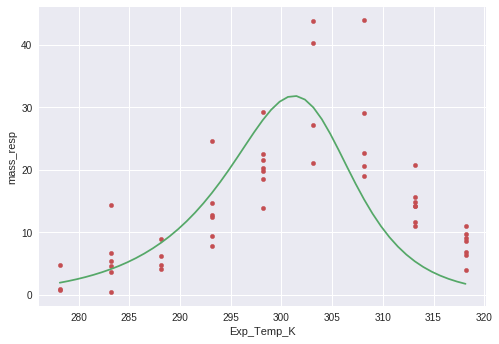

Round: 7 
The stream temp was:  8.1
AIC value: 188.14 
BIC value: 191.92 
Eh Parameter <Parameter 'Eh', value=2.9262102567845121 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.1356038758230524 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 35
    # data points      = 49
    # variables        = 2
    chi-square         = 2894.204
    reduced chi-square = 61.579
[[Variables]]
    mass_resp_coef:    0.53367029 +/- 0.058751 (11.01%) (init= 0.7997719)
    mass_resp_at_10:   10.0000592 +/- 1.577403 (15.77%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.135604 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.899

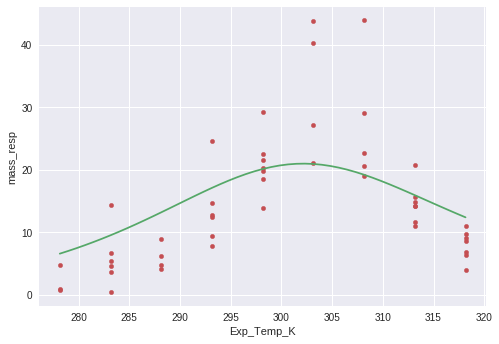

Round: 8 
The stream temp was:  8.1
AIC value: 205.90 
BIC value: 209.68 
Eh Parameter <Parameter 'Eh', value=1.1356038758230524 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.7600543292623945 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 31
    # data points      = 49
    # variables        = 2
    chi-square         = 1991.931
    reduced chi-square = 42.382
[[Variables]]
    mass_resp_coef:    0.74241258 +/- 0.058660 (7.90%) (init= 0.7997719)
    mass_resp_at_10:   6.88906501 +/- 1.046169 (15.19%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.760054 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.931 

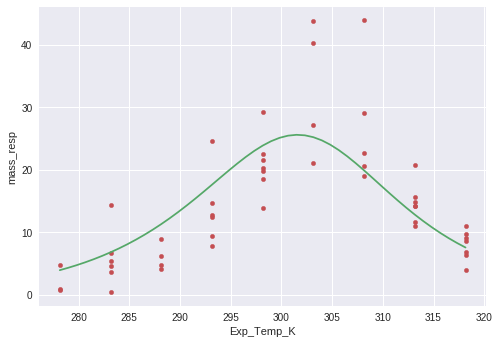

Round: 9 
The stream temp was:  8.1
AIC value: 187.59 
BIC value: 191.37 
Eh Parameter <Parameter 'Eh', value=1.7600543292623945 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.3628400561798237 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 47
    # data points      = 49
    # variables        = 2
    chi-square         = 3138.396
    reduced chi-square = 66.774
[[Variables]]
    mass_resp_coef:    0.99999996 +/- 0.113892 (11.39%) (init= 0.7997719)
    mass_resp_at_10:   4.02743181 +/- 1.161355 (28.84%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.36284 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.968 

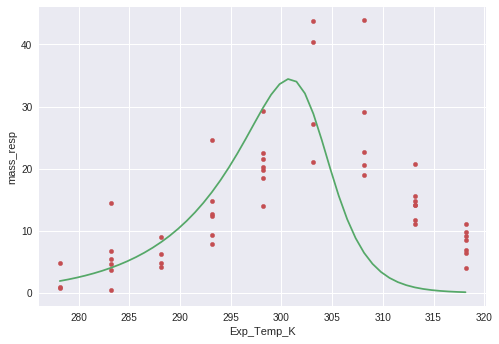

Round: 10 
The stream temp was:  8.1
AIC value: 209.86 
BIC value: 213.65 
Eh Parameter <Parameter 'Eh', value=4.3628400561798237 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.6490738667796929 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 49
    # variables        = 2
    chi-square         = 1856.797
    reduced chi-square = 39.506
[[Variables]]
    mass_resp_coef:    0.99999956 +/- 0.121362 (12.14%) (init= 0.7997719)
    mass_resp_at_10:   4.08347050 +/- 0.768602 (18.82%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.649074 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.95

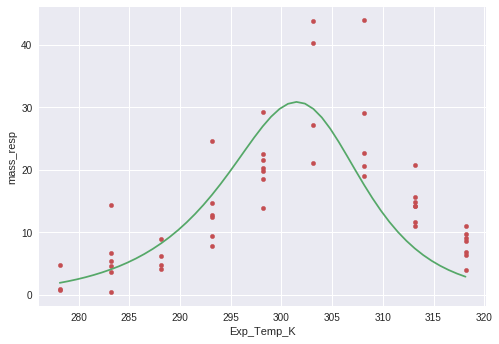

Round: 11 
The stream temp was:  8.1
AIC value: 184.15 
BIC value: 187.93 
Eh Parameter <Parameter 'Eh', value=2.6490738667796929 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.7678673972923988 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 36
    # data points      = 49
    # variables        = 2
    chi-square         = 1913.960
    reduced chi-square = 40.723
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.031155 (3.12%) (init= 0.7997719)
    mass_resp_at_10:   4.10714912 +/- 0.794701 (19.35%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.767867 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.960

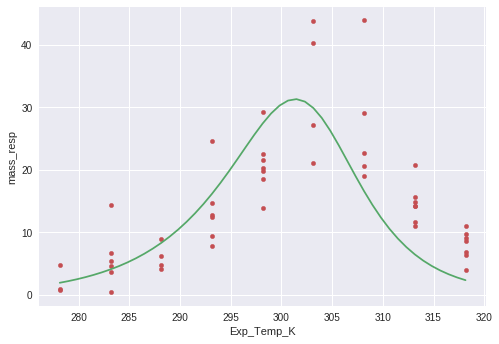

Round: 12 
The stream temp was:  8.1
AIC value: 185.63 
BIC value: 189.42 
Eh Parameter <Parameter 'Eh', value=2.7678673972923988 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.6139999869274826 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 37
    # data points      = 49
    # variables        = 2
    chi-square         = 2569.040
    reduced chi-square = 54.660
[[Variables]]
    mass_resp_coef:    0.99999993 +/- 0.105357 (10.54%) (init= 0.7997719)
    mass_resp_at_10:   4.10986214 +/- 1.007327 (24.51%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.614 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.965 


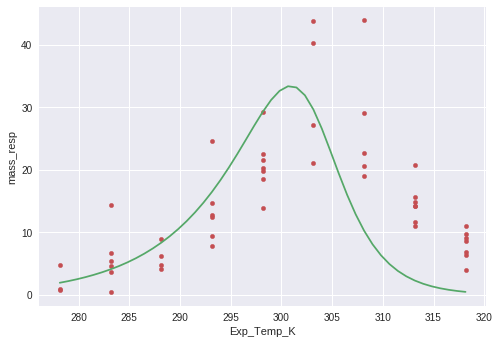

Round: 13 
The stream temp was:  8.1
AIC value: 200.06 
BIC value: 203.84 
Eh Parameter <Parameter 'Eh', value=3.6139999869274826 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.3012987363074038 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 36
    # data points      = 49
    # variables        = 2
    chi-square         = 2581.884
    reduced chi-square = 54.934
[[Variables]]
    mass_resp_coef:    0.58978922 +/- 0.058020 (9.84%) (init= 0.7997719)
    mass_resp_at_10:   9.08758846 +/- 1.400378 (15.41%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.301299 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.908

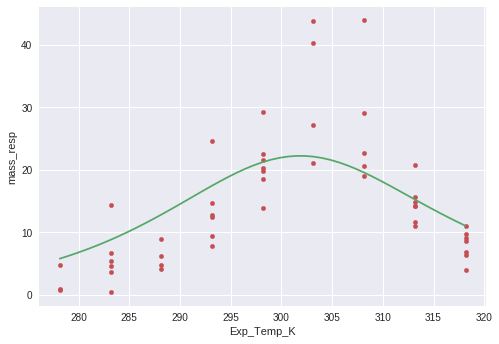

Round: 14 
The stream temp was:  8.1
AIC value: 200.30 
BIC value: 204.08 
Eh Parameter <Parameter 'Eh', value=1.3012987363074038 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.6011723120337682 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 30
    # data points      = 49
    # variables        = 2
    chi-square         = 2149.193
    reduced chi-square = 45.728
[[Variables]]
    mass_resp_coef:    0.69015853 +/- 0.057906 (8.39%) (init= 0.7997719)
    mass_resp_at_10:   7.59726479 +/- 1.148397 (15.12%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.601172 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.924

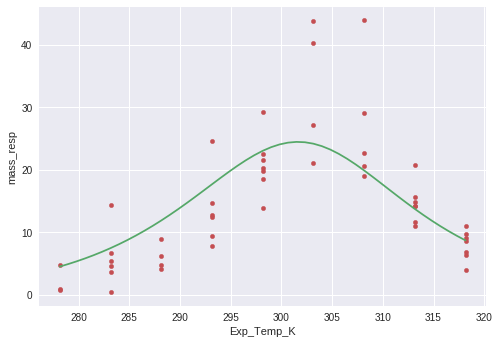

Round: 15 
The stream temp was:  8.1
AIC value: 191.31 
BIC value: 195.10 
Eh Parameter <Parameter 'Eh', value=1.6011723120337682 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.1150755826495082 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 37
    # data points      = 49
    # variables        = 2
    chi-square         = 2962.243
    reduced chi-square = 63.026
[[Variables]]
    mass_resp_coef:    0.99999976 +/- 0.121021 (12.10%) (init= 0.7997719)
    mass_resp_at_10:   4.05701088 +/- 1.115422 (27.49%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.115076 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.96

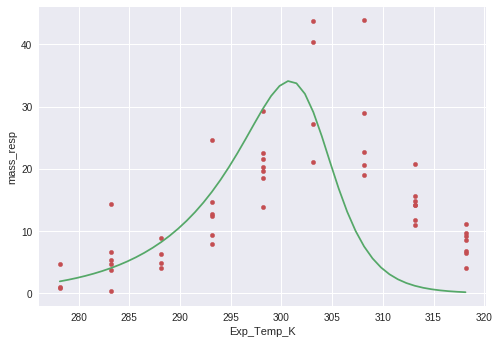

Round: 16 
The stream temp was:  8.1
AIC value: 207.03 
BIC value: 210.82 
Eh Parameter <Parameter 'Eh', value=4.1150755826495082 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=0.81669477316027839 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 41
    # data points      = 49
    # variables        = 2
    chi-square         = 3601.965
    reduced chi-square = 76.638
[[Variables]]
    mass_resp_coef:    0.42409618 +/- 0.061004 (14.38%) (init= 0.7997719)
    mass_resp_at_10:   12.0074457 +/- 2.011482 (16.75%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                0.8166948 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.

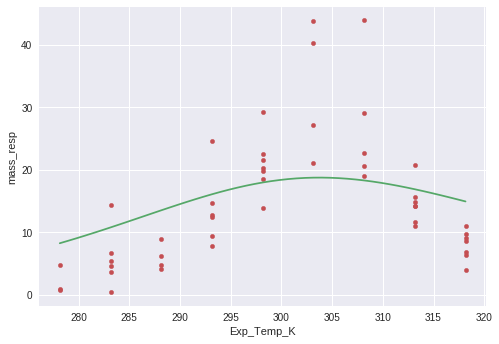

Round: 17 
The stream temp was:  8.1
AIC value: 216.62 
BIC value: 220.40 
Eh Parameter <Parameter 'Eh', value=0.81669477316027839 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.6855323313603012 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 37
    # data points      = 49
    # variables        = 2
    chi-square         = 2627.706
    reduced chi-square = 55.909
[[Variables]]
    mass_resp_coef:    0.99999995 +/- 0.107511 (10.75%) (init= 0.7997719)
    mass_resp_at_10:   4.10336438 +/- 1.024010 (24.96%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.685532 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.9

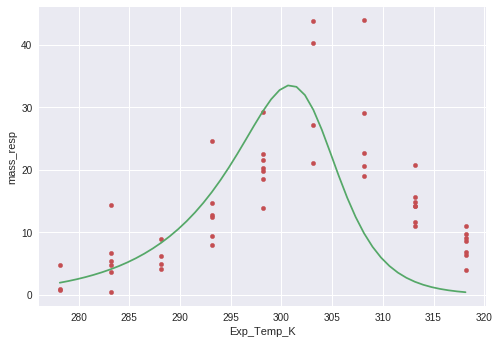

Round: 18 
The stream temp was:  8.1
AIC value: 201.16 
BIC value: 204.95 
Eh Parameter <Parameter 'Eh', value=3.6855323313603012 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.796875766731949 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 39
    # data points      = 49
    # variables        = 2
    chi-square         = 3416.002
    reduced chi-square = 72.681
[[Variables]]
    mass_resp_coef:    0.99999998 +/- 0.136757 (13.68%) (init= 0.7997719)
    mass_resp_at_10:   3.97497124 +/- 1.231068 (30.97%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.796876 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.969

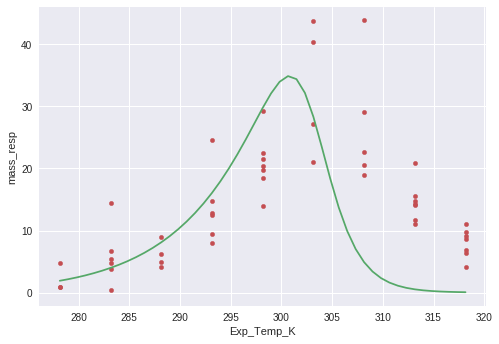

Round: 19 
The stream temp was:  8.1
AIC value: 214.02 
BIC value: 217.80 
Eh Parameter <Parameter 'Eh', value=4.796875766731949 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.7282980678267954 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 65
    # data points      = 113
    # variables        = 2
    chi-square         = 7445.493
    reduced chi-square = 67.077
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.154080 (15.41%) (init= 0.7997719)
    mass_resp_at_10:   2.51456455 +/- 0.737343 (29.32%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.728298 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.96

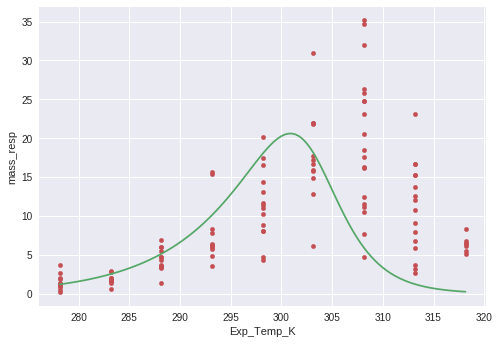

Round: 1 
The stream temp was:  9.6
AIC value: 479.26 
BIC value: 484.71 
Eh Parameter <Parameter 'Eh', value=3.7282980678267954 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.158123220340161 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 57
    # data points      = 113
    # variables        = 2
    chi-square         = 3541.510
    reduced chi-square = 31.905
[[Variables]]
    mass_resp_coef:    1          +/- 0.024862 (2.49%) (init= 0.7997719)
    mass_resp_at_10:   2.66041032 +/- 0.413379 (15.54%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.158123 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.956 

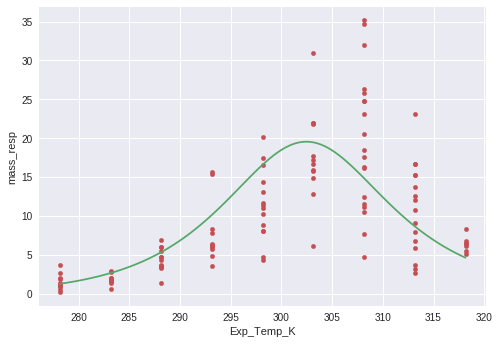

Round: 2 
The stream temp was:  9.6
AIC value: 395.29 
BIC value: 400.75 
Eh Parameter <Parameter 'Eh', value=2.158123220340161 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.1295668325530319 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 74
    # data points      = 113
    # variables        = 2
    chi-square         = 3484.339
    reduced chi-square = 31.390
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.012135 (1.21%) (init= 0.7997719)
    mass_resp_at_10:   2.65246736 +/- 0.407588 (15.37%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.129567 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.956 

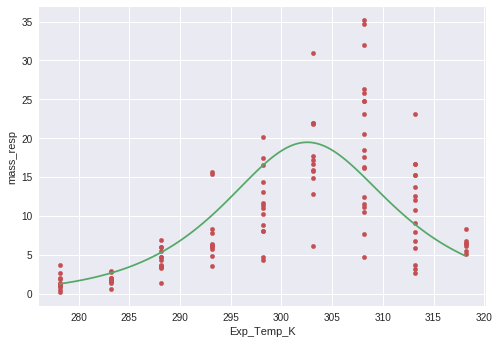

Round: 3 
The stream temp was:  9.6
AIC value: 393.45 
BIC value: 398.91 
Eh Parameter <Parameter 'Eh', value=2.1295668325530319 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.5689966070787387 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 55
    # data points      = 113
    # variables        = 2
    chi-square         = 7128.440
    reduced chi-square = 64.220
[[Variables]]
    mass_resp_coef:    0.99999991 +/- 0.120555 (12.06%) (init= 0.7997719)
    mass_resp_at_10:   2.54523772 +/- 0.713105 (28.02%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.568997 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.96

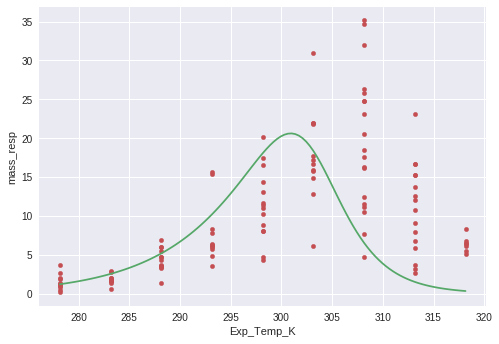

Round: 4 
The stream temp was:  9.6
AIC value: 474.34 
BIC value: 479.80 
Eh Parameter <Parameter 'Eh', value=3.5689966070787387 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.2791146670003286 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 58
    # data points      = 113
    # variables        = 2
    chi-square         = 8362.430
    reduced chi-square = 75.337
[[Variables]]
    mass_resp_coef:    0.99999993 +/- 0.147178 (14.72%) (init= 0.7997719)
    mass_resp_at_10:   2.41492265 +/- 0.805498 (33.36%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.279115 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.96

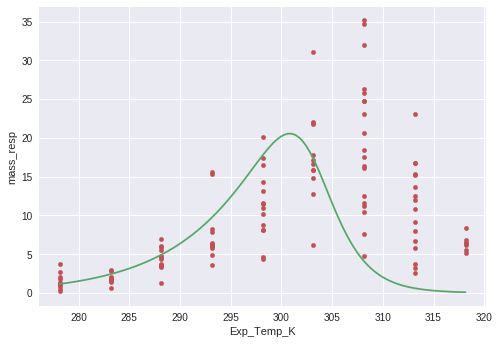

Round: 5 
The stream temp was:  9.6
AIC value: 492.38 
BIC value: 497.84 
Eh Parameter <Parameter 'Eh', value=4.2791146670003286 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.8266887163098424 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 46
    # data points      = 113
    # variables        = 2
    chi-square         = 9050.533
    reduced chi-square = 81.536
[[Variables]]
    mass_resp_coef:    0.99999963 +/- 0.161424 (16.14%) (init= 0.7997719)
    mass_resp_at_10:   2.32970445 +/- 0.855379 (36.72%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.826689 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.96

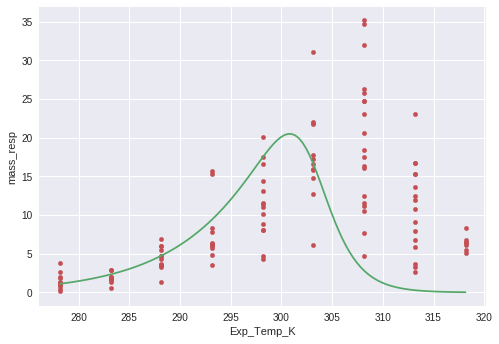

Round: 6 
The stream temp was:  9.6
AIC value: 501.32 
BIC value: 506.77 
Eh Parameter <Parameter 'Eh', value=4.8266887163098424 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.3695196541408405 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 48
    # data points      = 113
    # variables        = 2
    chi-square         = 8489.587
    reduced chi-square = 76.483
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.060315 (6.03%) (init= 0.7997719)
    mass_resp_at_10:   2.39972234 +/- 0.814804 (33.95%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.36952 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.968 

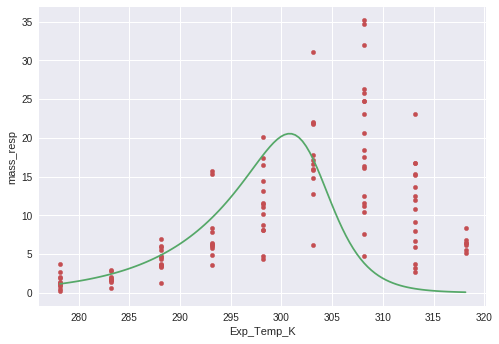

Round: 7 
The stream temp was:  9.6
AIC value: 494.09 
BIC value: 499.54 
Eh Parameter <Parameter 'Eh', value=4.3695196541408405 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.9068376010712047 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 51
    # data points      = 113
    # variables        = 2
    chi-square         = 3175.332
    reduced chi-square = 28.607
[[Variables]]
    mass_resp_coef:    0.99999996 +/- 0.050900 (5.09%) (init= 0.7997719)
    mass_resp_at_10:   2.55722665 +/- 0.370924 (14.50%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.906838 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.956

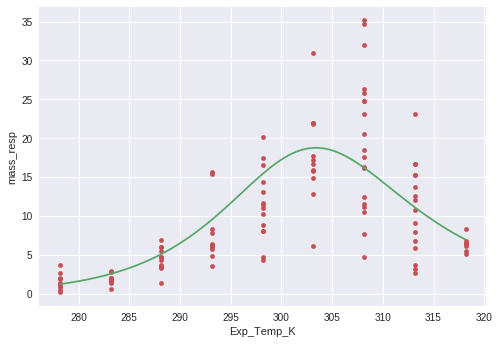

Round: 8 
The stream temp was:  9.6
AIC value: 382.96 
BIC value: 388.42 
Eh Parameter <Parameter 'Eh', value=1.9068376010712047 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.0285232856096647 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 45
    # data points      = 113
    # variables        = 2
    chi-square         = 3310.683
    reduced chi-square = 29.826
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.047454 (4.75%) (init= 0.7997719)
    mass_resp_at_10:   2.61695027 +/- 0.388839 (14.86%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.028523 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.956

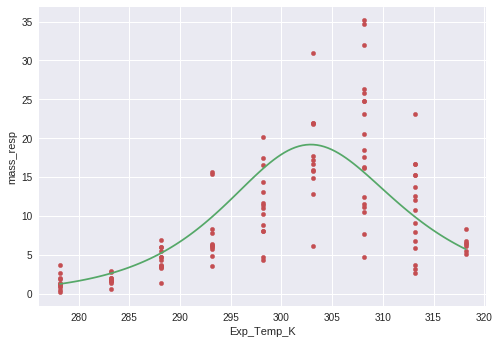

Round: 9 
The stream temp was:  9.6
AIC value: 387.68 
BIC value: 393.13 
Eh Parameter <Parameter 'Eh', value=2.0285232856096647 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.9057186915554158 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 40
    # data points      = 113
    # variables        = 2
    chi-square         = 9135.217
    reduced chi-square = 82.299
[[Variables]]
    mass_resp_coef:    1          +/- 0.028660 (2.87%) (init= 0.7997719)
    mass_resp_at_10:   2.31841637 +/- 0.861442 (37.16%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.905719 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.969

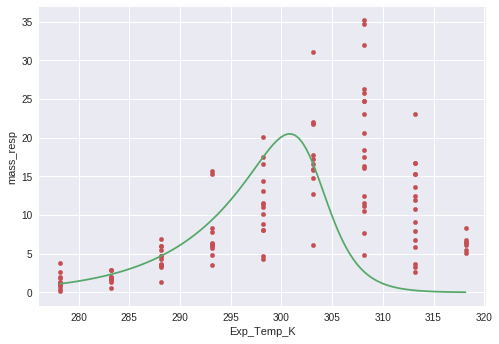

Round: 10 
The stream temp was:  9.6
AIC value: 502.37 
BIC value: 507.83 
Eh Parameter <Parameter 'Eh', value=4.9057186915554158 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=2.7555540365149271 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 56
    # data points      = 113
    # variables        = 2
    chi-square         = 5114.508
    reduced chi-square = 46.077
[[Variables]]
    mass_resp_coef:    0.99999999 +/- 0.027498 (2.75%) (init= 0.7997719)
    mass_resp_at_10:   2.68495197 +/- 0.553799 (20.63%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                2.755554 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.96

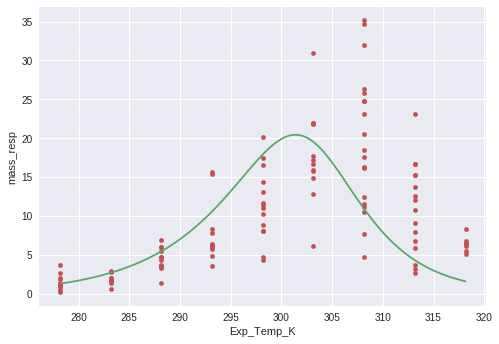

Round: 11 
The stream temp was:  9.6
AIC value: 436.82 
BIC value: 442.28 
Eh Parameter <Parameter 'Eh', value=2.7555540365149271 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=4.3951413675877884 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 48
    # data points      = 113
    # variables        = 2
    chi-square         = 8524.568
    reduced chi-square = 76.798
[[Variables]]
    mass_resp_coef:    0.99999986 +/- 0.149009 (14.90%) (init= 0.7997719)
    mass_resp_at_10:   2.39565972 +/- 0.817361 (34.12%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                4.395141 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.9

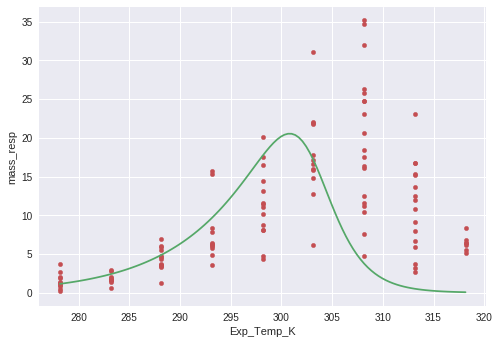

Round: 12 
The stream temp was:  9.6
AIC value: 494.55 
BIC value: 500.01 
Eh Parameter <Parameter 'Eh', value=4.3951413675877884 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.3963417872050115 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 31
    # data points      = 113
    # variables        = 2
    chi-square         = 3489.526
    reduced chi-square = 31.437
[[Variables]]
    mass_resp_coef:    0.82588910 +/- 0.046328 (5.61%) (init= 0.7997719)
    mass_resp_at_10:   3.54477326 +/- 0.492587 (13.90%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.396342 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.94

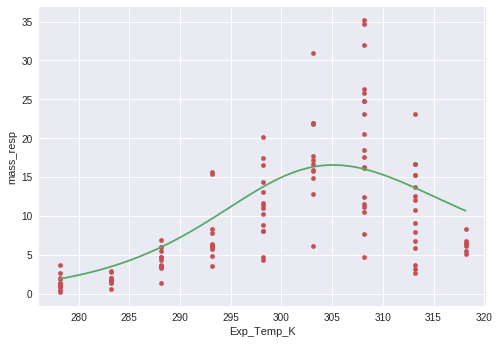

Round: 13 
The stream temp was:  9.6
AIC value: 393.62 
BIC value: 399.08 
Eh Parameter <Parameter 'Eh', value=1.3963417872050115 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.4742183893544887 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 113
    # variables        = 2
    chi-square         = 3392.671
    reduced chi-square = 30.565
[[Variables]]
    mass_resp_coef:    0.86322433 +/- 0.046797 (5.42%) (init= 0.7997719)
    mass_resp_at_10:   3.28126476 +/- 0.458959 (13.99%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.474218 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.94

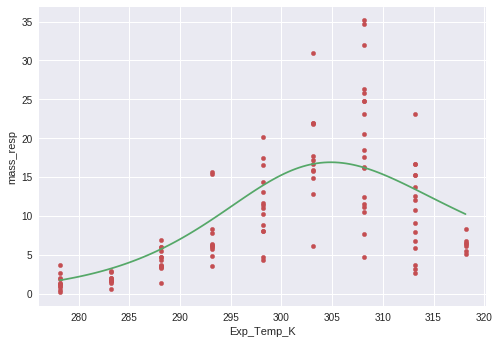

Round: 14 
The stream temp was:  9.6
AIC value: 390.44 
BIC value: 395.90 
Eh Parameter <Parameter 'Eh', value=1.4742183893544887 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.6187117145511638 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 25
    # data points      = 113
    # variables        = 2
    chi-square         = 3248.324
    reduced chi-square = 29.264
[[Variables]]
    mass_resp_coef:    0.93454361 +/- 0.047947 (5.13%) (init= 0.7997719)
    mass_resp_at_10:   2.82132391 +/- 0.402207 (14.26%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.618712 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.95

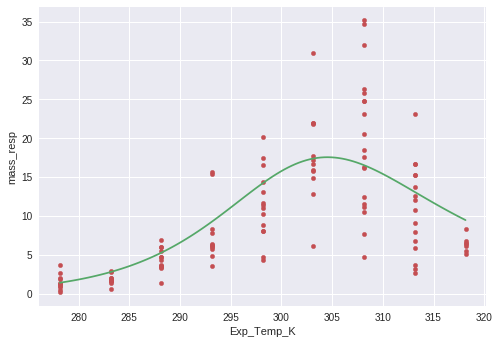

Round: 15 
The stream temp was:  9.6
AIC value: 385.53 
BIC value: 390.98 
Eh Parameter <Parameter 'Eh', value=1.6187117145511638 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.494334014056951 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 30
    # data points      = 113
    # variables        = 2
    chi-square         = 3369.818
    reduced chi-square = 30.359
[[Variables]]
    mass_resp_coef:    0.87300403 +/- 0.046920 (5.37%) (init= 0.7997719)
    mass_resp_at_10:   3.21483822 +/- 0.450692 (14.02%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.494334 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.949

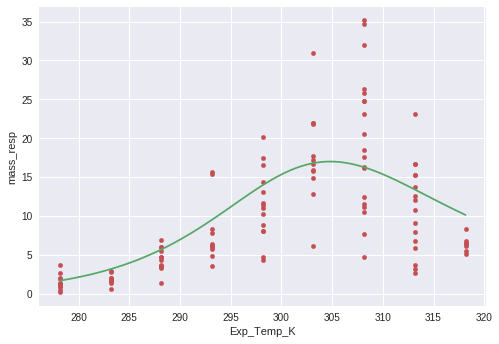

Round: 16 
The stream temp was:  9.6
AIC value: 389.68 
BIC value: 395.13 
Eh Parameter <Parameter 'Eh', value=1.494334014056951 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=1.9595643742836215 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 53
    # data points      = 113
    # variables        = 2
    chi-square         = 3222.720
    reduced chi-square = 29.034
[[Variables]]
    mass_resp_coef:    0.99999992 +/- 2.038603 (203.86%) (init= 0.7997719)
    mass_resp_at_10:   2.58551104 +/- 0.377983 (14.62%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                1.959564 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  =  0.9

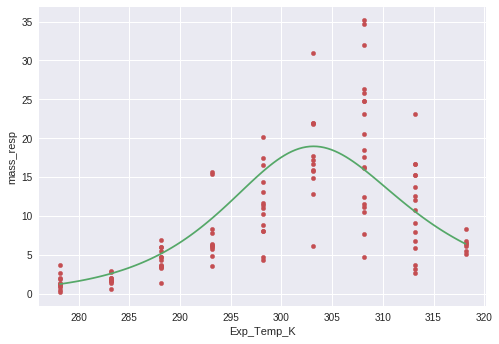

Round: 17 
The stream temp was:  9.6
AIC value: 384.63 
BIC value: 390.09 
Eh Parameter <Parameter 'Eh', value=1.9595643742836215 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.3108530511282082 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 49
    # data points      = 113
    # variables        = 2
    chi-square         = 6559.353
    reduced chi-square = 59.093
[[Variables]]
    mass_resp_coef:    0.99999990 +/- 0.109281 (10.93%) (init= 0.7997719)
    mass_resp_at_10:   2.59505534 +/- 0.669168 (25.79%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.310853 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.9

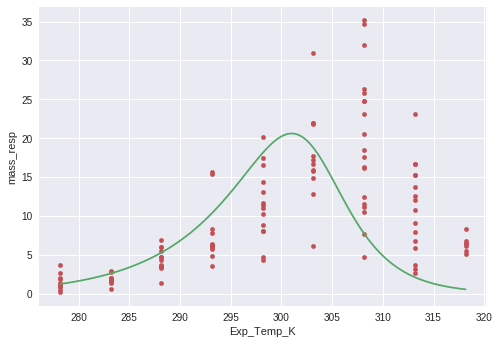

Round: 18 
The stream temp was:  9.6
AIC value: 464.94 
BIC value: 470.40 
Eh Parameter <Parameter 'Eh', value=3.3108530511282082 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------
<Parameter 'Eh', value=3.7673618172610706 (fixed), bounds=[None:None]>
True
[[Fit Statistics]]
    # function evals   = 56
    # data points      = 113
    # variables        = 2
    chi-square         = 7519.424
    reduced chi-square = 67.743
[[Variables]]
    mass_resp_coef:    0.99999991 +/- 0.129086 (12.91%) (init= 0.7997719)
    mass_resp_at_10:   2.50712651 +/- 0.742789 (29.63%) (init=-0.108615)
    Temp_H_K:          303 (fixed)
    boltz:             8.61733e-05 (fixed)
    Eh:                3.767362 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(mass_resp_coef, mass_resp_at_10)  = -0.9

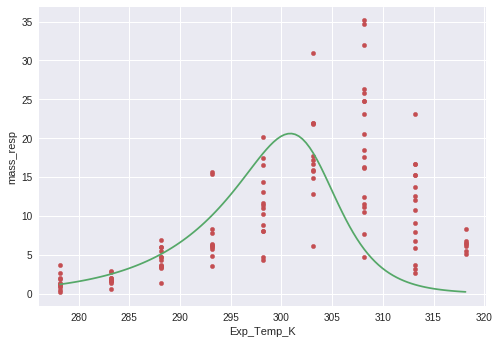

Round: 19 
The stream temp was:  9.6
AIC value: 480.38 
BIC value: 485.83 
Eh Parameter <Parameter 'Eh', value=3.7673618172610706 (fixed), bounds=[None:None]>
The best EH value so far:  <Parameter 'Eh', value=2.2814636095159901 (fixed), bounds=[None:None]> 
The aic of that:  182.223639274 
and the bic of that:  186.00727987
-----------------------
-----------------------


In [69]:
grouped2 = new_df.groupby("stream_temp")

for name, group in grouped2:    
    for l in range(1,20): 
        try:
            x = np.linspace(group["Exp_Temp_K"].min(),group["Exp_Temp_K"].max(),len(group["Exp_Temp_K"]))
            data = group.mass_resp.values
            try_params.add("Eh", value =random.uniform(-model4.params[1],5), vary = False)
            print(try_params["Eh"])
            trying = minimize(residual, try_params, args=(x, data))   
            print(trying.success)
            # calculate final result
            final = data + trying.residual
            # write error report
            report_fit(trying)
            
            if trying.aic < 2800:
                # plot the data
                group.plot.scatter(x = "Exp_Temp_K", y =  "mass_resp", marker ='o', color = "r")
                #plt.plot(x, data, 'bo')
                plt.plot(x, final, 'g')
                plt.show()

            if (trying.aic < last_EH_aic_val and trying.bic < last_EH_bic_val):  
                best_EH_param = try_params["Eh"]
                last_EH_aic_val = trying.aic
                last_EH_bic_val = trying.bic

            print("Round: {0} ".format(l))
            print("The stream temp was: ", name)
            print("AIC value: {0:.2f} \nBIC value: {1:.2f} \nEh Parameter {2}".format(trying.aic, trying.bic, try_params["Eh"]))
            print("The best EH value so far: ", best_EH_param, "\nThe aic of that: ", last_EH_aic_val,
                  "\nand the bic of that: ", last_EH_bic_val)
            #return(best_EH_param, last_EH_aic_val, last_EH_bic_val)   
            print("-----------------------\n-----------------------")

        except:
            print("this didn't work")

SyntaxError: can't assign to operator (<ipython-input-43-7a6b3dd03597>, line 1)

4.41569501484
-0.799771869143
